# The Question 

What is the role first-person sensory experience in conceptual development?

# The experimental setup

Congenitally blind (n=27) and aged-matched sighted adults (n=23) judged the semantic similarity for pairs of verbs describing perceptual experience (visual e.g. "to peek”, tactile e.g. “to touch”, and amodal e.g. "to explore"), perceptible qualities (visual e.g. "to shimmer" and auditory e.g. "to boom") and manner of motion (e.g. "to spin", "to strut").

Participants rated the semantic similarly of verb pairs (e.g. to see, to touch) on a scale from 1 (not at all similar) to 7 (very similar). The survey was done using an online survey, programmed in-house for maximal screen-reader compatibility. Each participant from the test groups rated all of the verb pairs (2865). 


# Data Management


## Set Up

Grab the packages and set parameters and functions 

In [1]:
#packages for analyses 
options(repos="http://cran.mtu.edu/") #bc jupyter doesn't have a default 

require("RColorBrewer")
require("reshape")
require("ez")
require("psych")
require("mnormt")
require("plotrix")
require("gplots")
require("Hmisc")
require("pracma")
require("quadprog")
require("smacof")
require("nnls")
require("pvclust")
require("data.table")
require("RMySQL")

version ## this should get updated soon! 


Loading required package: RColorBrewer
Loading required package: reshape
Loading required package: ez
Loading required package: psych
Warning message:
: package ‘psych’ was built under R version 3.3.0Loading required package: mnormt
Warning message:
: package ‘mnormt’ was built under R version 3.3.0Loading required package: plotrix

Attaching package: ‘plotrix’

The following object is masked from ‘package:psych’:

    rescale

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:plotrix’:

    plotCI

The following object is masked from ‘package:stats’:

    lowess

Loading required package: Hmisc
Warning message:
: package ‘Hmisc’ was built under R version 3.3.0Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha


Attaching package: ‘Hmisc’

The 

               _                           
platform       x86_64-apple-darwin11.4.2   
arch           x86_64                      
os             darwin11.4.2                
system         x86_64, darwin11.4.2        
status                                     
major          3                           
minor          2.2                         
year           2015                        
month          08                          
day            14                          
svn rev        69053                       
language       R                           
version.string R version 3.2.2 (2015-08-14)
nickname       Fire Safety                 

In [87]:
#function for lenth without NAs
length2 <- function (x, na.rm=TRUE) {
  if (na.rm) sum(!is.na(x))
  else       length(x)
}

      
#make jupyter visualization cleaner 
options(repr.plot.width=4, repr.plot.height=3)


#colors!
colors <- brewer.pal(4, "Set1")
    #display.brewer.pal(4, "Set1")
pal <- colorRampPalette(colors)
    #display.brewer.all(n=NULL, type="all", select=NULL, exact.n=TRUE)



## Data -- fetch and label

### Data from local directory or SQL server

In [102]:
## GET THE DATA --------------------------------

local = T #1 = local, 0 = remote from mindhive mysql (note that mariadb-connection must be installed locally)

setwd("/Users/jorie/Dropbox (MIT)/Saxelab/Projects/sight_verbs/SVSB - BKIDS")

if(!local){consql <- dbConnect(RMySQL::MySQL(), host = "mindhive.mit.edu", user = "BKIDS", password = "BKIDS123")}

ifelse(local, data <- read.csv('Ape_A.csv',header=TRUE,sep=";"),data <- dbSendQuery(consql, "select * from Ape_A"))
data.frame(lapply(data, as.character), stringsAsFactors=FALSE) -> data
data[!is.na(data) & data=="v"] <- 99  #catch questions 
datamelt_ExpA <- melt(data = data,id.vars = c("pid","land_time","subject"),value.name = "rating",variable_name = "Vboth")
datamelt_ExpA$Category <- "Experience"

ifelse(local, data <- read.csv('Ape_B.csv',header=TRUE,sep=";"),data <- dbSendQuery(consql, "select * from Ape_B"))
data.frame(lapply(data, as.character), stringsAsFactors=FALSE) -> data
data[!is.na(data) & data=="v"] <- 99  #catch questions 
datamelt_ExpB <- melt(data = data,id.vars = c("pid","land_time","subject"),value.name = "rating",variable_name = "Vboth")
datamelt_ExpB$Category <- "Experience"

ifelse(local, data <- read.csv('Alligator_A.csv',header=TRUE,sep=";"),data <- dbSendQuery(consql, "select * from Alligator_A"))
data.frame(lapply(data, as.character), stringsAsFactors=FALSE) -> data
data[!is.na(data) & data=="v"] <- 99  #catch questions 
datamelt_ExpC<- melt(data = data,id.vars = c("pid","land_time","subject"),value.name = "rating",variable_name = "Vboth")
datamelt_ExpC$Category <- "Experience"

ifelse(local, data <- read.csv('Alligator_B.csv',header=TRUE,sep=";"),data <- dbSendQuery(consql, "select * from Alligator_B"))
data.frame(lapply(data, as.character), stringsAsFactors=FALSE) -> data
data[!is.na(data) & data=="v"] <- 99  #catch questions 
datamelt_ExpD <- melt(data = data,id.vars = c("pid","land_time","subject"),value.name = "rating",variable_name = "Vboth")
datamelt_ExpD$Category <- "Experience"

ifelse(local, data <- read.csv('Elephant_A.csv',header=TRUE,sep=";"),data <- dbSendQuery(consql, "select * from Elephant_A"))
data.frame(lapply(data, as.character), stringsAsFactors=FALSE) -> data
data[!is.na(data) & data=="v"] <- 99  #catch questions 
datamelt_Qual1 <- melt(data = data,id.vars = c("pid","land_time","subject"),value.name = "rating",variable_name = "Vboth")
datamelt_Qual1$Category <- "Quality"

ifelse(local, data <- read.csv('Elephant_B.csv',header=TRUE,sep=","),data <- dbSendQuery(consql, "select * from Elephant_B"))
data.frame(lapply(data, as.character), stringsAsFactors=FALSE) -> data
data[!is.na(data) & data=="v"] <- 99  #catch questions 
datamelt_Qual2 <- melt(data = data,id.vars = c("pid","land_time","subject"),value.name = "rating",variable_name = "Vboth")
datamelt_Qual2$Category <- "Quality"

ifelse(local, data <- read.csv('Mouse_A.csv',header=TRUE,sep=";"),data <- dbSendQuery(consql, "select * from Mouse_A"))
data.frame(lapply(data, as.character), stringsAsFactors=FALSE) -> data
data[!is.na(data) & data=="v"] <- 99  #catch questions 
datamelt_Mot1 <- melt(data = data,id.vars = c("pid","land_time","subject"),value.name = "rating",variable_name = "Vboth")
datamelt_Mot1$Category <- "Motion"

ifelse(local, data <- read.csv('Mouse_B.csv',header=TRUE,sep=";"),data <- dbSendQuery(consql, "select * from Mouse_B"))
data.frame(lapply(data, as.character), stringsAsFactors=FALSE) -> data
data[!is.na(data) & data=="v"] <- 99  #catch questions 
datamelt_Mot2 <- melt(data = data,id.vars = c("pid","land_time","subject"),value.name = "rating",variable_name = "Vboth")
datamelt_Mot2$Category <- "Motion"

#combine it all
rbind(datamelt_Qual1,datamelt_Qual2,datamelt_Mot1,datamelt_Mot2,datamelt_ExpA,datamelt_ExpB,datamelt_ExpC,datamelt_ExpD) -> datamelt

#close out any connection
if(!local){dbDisconnect(con)}


[[1]]
 [1] 13  2  4  5  6  7  8  9 10 11 12 14 15 16 17 18

[[1]]
 [1]  1 13  3  4  5  6  7  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24 25 26 27

[[1]]
 [1]  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[1]]
 [1] 12  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23

[[1]]
 [1]  1  2  3  4  5  6 12  9 10 11 13 14 15 16

[[1]]
 [1]  1 13  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22

[[1]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

[[1]]
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [103]:
#View the raw data
datamelt[seq(1,100000,1000),-6]

,pid,land_time,subject,Vboth,value
1,1,2010-12-03 18:47:57,SAX_SVS2_01,to_bellow_AND_to_bark,1
1001,12,2011-01-19 10:47:07,SAX_SVS2_23,to_bark_AND_to_blaze,1
2001,15,2011-11-20 19:51:07,SAX_SVSL_04,to_mutter_AND_to_blink,1
3001,5,2010-12-07 20:36:02,SAX_SVS2_11,to_glow_AND_to_buzz,1
4001,13,2011-10-11 17:55:12,SAX_SVSB_08,to_flicker_AND_to_clang,1
5001,3,2010-12-05 15:53:37,SAX_SVS2_09,to_flash_AND_to_click,1
6001,10,2010-12-26 15:54:18,SAX_SVS2_21,to_gleam_AND_to_creak,3
7001,1,2010-12-03 18:47:57,SAX_SVS2_01,to_growl_AND_to_flare,1
8001,12,2011-01-19 10:47:07,SAX_SVS2_23,to_shout_AND_to_flicker,1
9001,15,2011-11-20 19:51:07,SAX_SVSL_04,to_glitter_AND_to_glint,5


### Reformat and add information

In [104]:
#get the IDs
datamelt$subject -> datamelt$subject_original
gsub("..._SVS","",datamelt$subject) -> datamelt$subject
gsub("2_","S_",datamelt$subject) -> datamelt$subject

#add a group variable (based on subject ID)
as.character(datamelt$subject) -> datamelt$subject
datamelt$Group <- sub('_..','',datamelt$subject)
datamelt$Group <- as.factor(datamelt$Group)   
as.factor(datamelt$subject) -> datamelt$subject

#turn the data into numbers (not factors)
datamelt$value -> datamelt$value_factor
as.numeric(as.character(datamelt$value)) -> datamelt$value 
as.factor(datamelt$value_factor) -> datamelt$value_factor
datamelt$value[datamelt$value == "NaN"] <- NA 

#get the words 
gsub(pattern = "_to_",replacement = "_",x = datamelt$Vboth) -> datamelt$Vboth
gsub(pattern = "^to_",replacement = "",x = datamelt$Vboth) -> datamelt$Vboth
sub(pattern = ".*_AND_",replacement = "",x = datamelt$Vboth) -> datamelt$V2
sub(pattern = '_AND.*', replacement = "",x = datamelt$Vboth) -> datamelt$V1

#alphabetize 
datamelt$Vboth <-  as.character(sapply(1: length(datamelt$V1),function(x) do.call("paste", as.list(c(sort(c(as.character(datamelt$V1[x]), as.character(datamelt$V2[x]))),sep="_AND_")))))

#average across duplicates within people 
keys <- colnames(datamelt)[c(3,4,6, 8)] 
X <- as.data.table(datamelt)
datamelt <- X[,list(value= mean(value,na.rm = T)),keys]

#single words again 
sub(pattern = ".*_AND_",replacement = "",x = datamelt$Vboth) -> datamelt$V2
sub(pattern = '_AND.*', replacement = "",x = datamelt$Vboth) -> datamelt$V1



Warning message:
In eval(expr, envir, enclos): NAs introduced by coercion

In [105]:
#get the categories 

SightEmission <- c( 'blaze',
                    'blink',
                    'flare',
                    'flash',
                    'flicker',
                    'gleam',
                    'glimmer',
                    'glint',
                    'glisten',
                    'glitter',
                    'glow',
                    'shimmer',
                    'shine',
                    'sparkle',
                    'twinkle')

SoundEmission <- c( 'beep',
                    'boom',
                    'buzz',
                    'chime',
                    'clang',
                    'clank',
                    'click',
                    'crackle',
                    'creak',
                    'crunch',
                    'gurgle',
                    'hiss',
                    'sizzle',
                    'squeak',
                    'twang')
SoundAgent = c( 'bark',
                'bellow',
                'groan',
                'growl',
                'grumble',
                'grunt',
                'howl',
                'moan',
                'mutter',
                'shout',
                'squawk',
                'wail',
                'whimper',
                'whisper',
                'yelp')

SightPerception <- c( 'gawk',
                      'gaze',
                      'glance',
                      'glimpse',
                      'leer',
                      'look',
                      'ogle',
                      'peek',
                      'peer',
                      'scan',
                      'see',
                      'spot',
                      'stare',
                      'view',
                      'watch')

TouchPerception <- c( 'caress',
                      'dab',
                      'feel',
                      'grip',
                      'nudge',
                      'pat',
                      'pet',
                      'pinch',
                      'prod',
                      'rub',
                      'scrape',
                      'stroke',
                      'tap',
                      'tickle',
                      'touch')

Amodal <- c( 'characterize',
             'choose',
             'classify',
             'define',
             'imagine',
             'know',
             'learn',
             'memorize',
             'plan',
             'question',
             'recollect',
             'remember',
             'search',
             'think',
             'understand',
             'admire',
             'appreciate',
             'discover',
             'enjoy',
             'examine',
             'identify',
             'investigate',
             'like',
             'note',
             'notice',
             'perceive',
             'recognize',
             'scrutinize',
             'study',
             'tolerate')

Mix <- c( 'admire',
          'appreciate',
          'discover',
          'enjoy',
          'examine',
          'identify',
          'investigate',
          'like',
          'note',
          'notice',
          'perceive',
          'recognize',
          'scrutinize',
          'study',
          'tolerate')

Cog <- c( 'characterize',
          'choose',
          'classify',
          'define',
          'imagine',
          'know',
          'learn',
          'memorize',
          'plan',
          'question',
          'recollect',
          'remember',
          'search',
          'think',
          'understand') 

Motion <- c(  'bounce',
              'float',
              'glide',
              'hobble',
              'roll',
              'saunter',
              'scurry',
              'skip',
              'slither',
              'spin',
              'strut',
              'trot',
              'twirl',
              'twist',
              'waddle')

#label verbs with their category   
datamelt$C1 <- NA
datamelt$C1[datamelt$V1 %in% SightEmission] <- "SightEmission"
datamelt$C1[datamelt$V1 %in% SoundEmission] <- "SoundEmission"
datamelt$C1[datamelt$V1 %in% SoundAgent] <- "SoundAgent"

datamelt$C1[datamelt$V1 %in% SightPerception] <- "SightPerception"
datamelt$C1[datamelt$V1 %in% TouchPerception] <- "TouchPerception"
datamelt$C1[datamelt$V1 %in% Amodal] <- "Amodal"

datamelt$C1[datamelt$V1 %in% Motion] <- "Motion"

datamelt$C2 <- NA
datamelt$C2[datamelt$V2 %in% SightEmission] <- "SightEmission"
datamelt$C2[datamelt$V2 %in% SoundEmission] <- "SoundEmission"
datamelt$C2[datamelt$V2 %in% SoundAgent] <- "SoundAgent"

datamelt$C2[datamelt$V2 %in% SightPerception] <- "SightPerception"
datamelt$C2[datamelt$V2 %in% TouchPerception] <- "TouchPerception"
datamelt$C2[datamelt$V2 %in% Amodal] <- "Amodal"

datamelt$C2[datamelt$V2 %in% Motion] <- "Motion"


#column for sub-disinctions (all within admodal)
datamelt$S1 <- as.character(datamelt$C1)
datamelt$S2 <- as.character(datamelt$C2)

datamelt$S1[datamelt$V1 %in% Mix] <- "Mix"
datamelt$S1[datamelt$V1 %in% Mix] <- "Cog"

datamelt$S2[datamelt$V2 %in% Mix] <- "Mix"
datamelt$S2[datamelt$V2 %in% Mix] <- "Cog"

as.factor(datamelt$C1) -> datamelt$C1
as.factor(datamelt$C2) -> datamelt$C2
as.factor(datamelt$S1) -> datamelt$S1
as.factor(datamelt$S2) -> datamelt$S2


# make a column with the combined names called SubCategory (main categories), and SubCategory2 (broken down categories)
datamelt$SubCategory <-   as.character(sapply(1: length(datamelt$C1),function(x) do.call("paste", as.list(c(sort(c(as.character(datamelt$C1[x]), as.character(datamelt$C2[x]))),sep="_")))))
datamelt$SubCategory2 <-   as.character(sapply(1: length(datamelt$S1),function(x) do.call("paste", as.list(c(sort(c(as.character(datamelt$S1[x]), as.character(datamelt$S2[x]))),sep="_")))))



In [108]:
#view the data
data.frame(datamelt)[seq(1,100000,1000),c(1,4,5,7,6,8,9,10,11)]

,subject,Group,value,V1,V2,C1,C2,S1,S2
1,S_01,S,1,bark,bellow,SoundAgent,SoundAgent,SoundAgent,SoundAgent
1001,S_23,S,1,bark,blaze,SoundAgent,SightEmission,SoundAgent,SightEmission
2001,L_04,L,1,blink,mutter,SightEmission,SoundAgent,SightEmission,SoundAgent
3001,S_11,S,1,buzz,glow,SoundEmission,SightEmission,SoundEmission,SightEmission
4001,B_08,B,1,clang,flicker,SoundEmission,SightEmission,SoundEmission,SightEmission
5001,S_09,S,1,click,flash,SoundEmission,SightEmission,SoundEmission,SightEmission
6001,S_21,S,3,creak,gleam,SoundEmission,SightEmission,SoundEmission,SightEmission
7001,S_01,S,1,flare,growl,SightEmission,SoundAgent,SightEmission,SoundAgent
8001,S_23,S,1,flicker,shout,SightEmission,SoundAgent,SightEmission,SoundAgent
9001,L_04,L,5,glint,glitter,SightEmission,SightEmission,SightEmission,SightEmission


### Data Cleaning - drop subjects and trials

In [7]:
#label the catch trials 
datamelt$SubCategory[ datamelt$SubCategory == "character(0)"]<- "vegetables"
datamelt$SubCategory2[ datamelt$SubCategory2 == "character(0)"]<- "vegetables"
as.character(datamelt$Category) -> datamelt$Category
datamelt[datamelt$SubCategory == "vegetables" ,]$Category <- paste(datamelt[datamelt$SubCategory == "vegetables" ,]$Category,"vegetables",sep="_")

as.factor(datamelt$SubCategory) -> datamelt$SubCategory
as.factor(datamelt$SubCategory2) -> datamelt$SubCategory2
as.factor(datamelt$Category) -> datamelt$Category




In [8]:
#summary per person (to see what everyone has completed/rated )

datasummary<-aggregate(datamelt$value, by = list(datamelt$Group, datamelt$Category, datamelt$subject),FUN=function(x) c(n1 = sum(x==1, na.rm = T), n2 = sum(x==2, na.rm = T), n3 = sum(x==3, na.rm = T), n4 = sum(x==4, na.rm = T),n5 = sum(x==5, na.rm = T), n6 = sum(x==6, na.rm = T), n7 = sum(x==7, na.rm = T), nv = sum(x==99, na.rm = T), total = length2(x), missing = sum(is.na(x))))

datasummary$percent <- NA 
datasummary[datasummary$Group.2 == "Experience",]$percent <- (datasummary[datasummary$Group.2 == "Experience",]$x[,9]-datasummary[datasummary$Group.2 == "Experience",]$x[,8])/1770
datasummary[datasummary$Group.2 == "Motion",]$percent <- (datasummary[datasummary$Group.2 == "Motion",]$x[,9]-datasummary[datasummary$Group.2 == "Motion",]$x[,8])/105
datasummary[datasummary$Group.2 == "Quality",]$percent <- (datasummary[datasummary$Group.2 == "Quality",]$x[,9]-datasummary[datasummary$Group.2 == "Quality",]$x[,8])/990

datasummary$catch <- NA 
datasummary[datasummary$Group.2 == "Experience_vegetables",]$catch <- (datasummary[datasummary$Group.2 == "Experience_vegetables",]$x[,8])/17
datasummary[datasummary$Group.2 == "Motion_vegetables",]$catch <- ( datasummary[datasummary$Group.2 == "Motion_vegetables",]$x[,8])/5
datasummary[datasummary$Group.2 == "Quality_vegetables",]$catch <- ( datasummary[datasummary$Group.2 == "Quality_vegetables",]$x[,8])/5

#flag people who completed less than 80% of a block, or who caught less than 80% of catch trials 
datasummary$flag <- ""
datasummary$flag[datasummary$percent < .8] <- "*"
datasummary$flag[datasummary$catch < .8] <- "*"

#catch people who didn't complete at least 4 blocks 
x<- table(datasummary$Group.3)
flag <- names(x[x<5])
datasummary$flag[datasummary$Group.3 %in% flag] <- "*"


#drop the people who don't meet threshold 
dropped <- as.character(unique(datasummary[datasummary$flag =="*",]$Group.3))
dropped
subset(datamelt, !(subject %in% dropped)) -> datamelt
as.factor(datamelt$subject) -> datamelt$subject

#code catch trials and drop incorrect trials
datamelt$catchtrials <- 0 
datamelt[ datamelt$SubCategory == "vegetables" & datamelt$value== 99 & !is.na(datamelt$value),]$catchtrials <- 1
datamelt[datamelt$value== 99 & !is.na(datamelt$value),]$value <- NA  #catch trials, and trials incorrected responded to as a catch trial 



[1] "B_01" "B_02" "B_05" "B_08" "B_15" "B_17" "B_20" "B_22" "B_26" "B_28"
[11] "B_32" "B_34" "B_39" "L_03" "L_06" "L_08" "S_06" "S_08" "S_13" "S_16"

In [9]:
#order to match subsequent analyses 
data.frame(datamelt) -> datamelt 
ordering <- c("C1","C2","S1","S2","Category","V1","V2","Vboth","SubCategory", "SubCategory2", "subject", "value", "Group", "catchtrials") 
datamelt[,ordering] -> datamelt

#save to local disk 
setwd("~/Dropbox (MIT)//Saxelab/Projects/sight_verbs/SVS_Analysis/Data")
write.csv(datamelt,file = "all_datamelt_demo.csv")


# Analysis

In [117]:
#grab the data 
setwd("~/Dropbox (MIT)//Saxelab/Projects/sight_verbs/SVS_Analysis/Data")
datamelt <- read.csv('all_datamelt.csv',header=TRUE,sep=",")
datamelt[,-1] -> datamelt


## Organize the Data

Data Frames for Analyses and Plotting 

In [118]:
## MAKE A SUBJECT LEVEL DATA FRAME  --------------------------------

#get means and std per subject/condition (collapsing across verb pairs)
#with mix vs cog distinction
subjdata <- aggregate(datamelt$value,list(datamelt$subject, datamelt$Group, datamelt$SubCategory2), FUN= function(x) c(m=mean(x, na.rm=TRUE), sd=sd(x, na.rm=TRUE)))
subjdata$x[,1] -> subjdata$mean
subjdata$x[,2] -> subjdata$sd
subjdata$x <- NULL
names(subjdata) <- c("subject", "Group", "SubCategory2", "mean", "sd")  

#get means and std per subject/condition (collapsing across verb pairs)
subjdata <- aggregate(datamelt$value,list(datamelt$subject, datamelt$Group, datamelt$SubCategory), FUN= function(x) c(m=mean(x, na.rm=TRUE), sd=sd(x, na.rm=TRUE)))
subjdata$x[,1] -> subjdata$mean
subjdata$x[,2] -> subjdata$sd
subjdata$x <- NULL
names(subjdata) <- c("subject", "Group", "SubCategory", "mean", "sd")


In [119]:
#View the data 
subjdata

,subject,Group,SubCategory,mean,sd
1,B_06,B,Amodal_Amodal,3.032184,1.256824
2,B_08,B,Amodal_Amodal,2.05977,1.146469
3,B_09,B,Amodal_Amodal,2.533333,1.373101
4,B_14,B,Amodal_Amodal,3.592166,1.922766
5,B_15,B,Amodal_Amodal,3.631336,1.591703
6,B_18,B,Amodal_Amodal,5.475862,0.9363334
7,B_19,B,Amodal_Amodal,3.05977,1.320213
8,B_22,B,Amodal_Amodal,2.850575,1.738217
9,B_23,B,Amodal_Amodal,NaN,NA
10,B_24,B,Amodal_Amodal,2.59447,1.572444


In [120]:
## MAKE A VERB LEVEL DATA FRAME --------------------------------

#get means and stdev per verb-pair (collapses across participants, split by group)
verbdata <- aggregate(c(datamelt$value), list(datamelt$Vboth, datamelt$Group, datamelt$Category, datamelt$SubCategory2, datamelt$S1, datamelt$S2, datamelt$V1,datamelt$V2 ), FUN= function(x) c(m=mean(x, na.rm=TRUE), sd=sd(x, na.rm=TRUE),se=std.error(x,na.rm=TRUE)))
verbdata$x[,1] -> verbdata$mean
verbdata$x[,2] -> verbdata$sd
verbdata$x[,3] -> verbdata$se
verbdata$x <- NULL
names(verbdata) <- c("Vboth", "Group", "Category", "SubCategory2", "S1","S2", "V1", "V2", "mean", "sd","se")
verbdata <- verbdata[order(verbdata$Vboth),]

#get means and stdev per verb-pair (collapses across participants, split by group)
verbdata <- aggregate(c(datamelt$value), list(datamelt$Vboth, datamelt$Group, datamelt$Category, datamelt$SubCategory, datamelt$C1, datamelt$C2, datamelt$V1,datamelt$V2 ), FUN= function(x) c(m=mean(x, na.rm=TRUE), sd=sd(x, na.rm=TRUE),se=std.error(x,na.rm=TRUE)))
verbdata$x[,1] -> verbdata$mean
verbdata$x[,2] -> verbdata$sd
verbdata$x[,3] -> verbdata$se
verbdata$x <- NULL
names(verbdata) <- c("Vboth", "Group", "Category", "SubCategory", "C1","C2", "V1", "V2", "mean", "sd","se")
verbdata <- verbdata[order(verbdata$Vboth),]


In [121]:
#View the data 
verbdata[1:100,]

,Vboth,Group,Category,SubCategory,C1,C2,V1,V2,mean,sd,se
1,to_admire_to_appreciate,B,Experience,Amodal_Amodal,Amodal,Amodal,to_admire,to_appreciate,6.083333,1.017955,0.2077891
2,to_admire_to_appreciate,L,Experience,Amodal_Amodal,Amodal,Amodal,to_admire,to_appreciate,5.5,1.080123,0.341565
3,to_admire_to_appreciate,REF,Experience,Amodal_Amodal,Amodal,Amodal,to_admire,to_appreciate,5.615385,NA,NA
4,to_admire_to_appreciate,S,Experience,Amodal_Amodal,Amodal,Amodal,to_admire,to_appreciate,5.818182,1.435481,0.3060456
89,to_admire_to_caress,B,Experience,Amodal_TouchPerception,Amodal,TouchPerception,to_admire,to_caress,3.208333,2.340181,0.4776875
90,to_admire_to_caress,L,Experience,Amodal_TouchPerception,Amodal,TouchPerception,to_admire,to_caress,4.5,1.269296,0.4013865
91,to_admire_to_caress,REF,Experience,Amodal_TouchPerception,Amodal,TouchPerception,to_admire,to_caress,2.24,NA,NA
92,to_admire_to_caress,S,Experience,Amodal_TouchPerception,Amodal,TouchPerception,to_admire,to_caress,3,1.772811,0.3779645
97,to_admire_to_characterize,B,Experience,Amodal_Amodal,Amodal,Amodal,to_admire,to_characterize,2.333333,1.632993,0.3333333
98,to_admire_to_characterize,L,Experience,Amodal_Amodal,Amodal,Amodal,to_admire,to_characterize,2.6,1.897367,0.6


In [122]:
## MAKE A GROUP LEVEL DATA FRAME --------------------------------

#get the data per group/condition (collasping across verb pairs, retaining subject-wise error)
groupdata <- aggregate(subjdata$mean,list(subjdata$Group, subjdata$SubCategory), FUN= function(x) c(m=mean(x, na.rm=TRUE), s=std.error(x, na.rm=TRUE), n=length2(x)))
groupdata$x[,1] -> groupdata$mean
groupdata$x[,2] -> groupdata$se
groupdata$x[,3] -> groupdata$n
groupdata$x <- NULL
names(groupdata) <- c("Group", "SubCategory", "mean", "se","n")

groupdata$mean -> temp
for (x in 1:dim(groupdata)[1] ) {
  temp[x] <- paste(round(groupdata$n[x],2), ": ", round(groupdata$mean[x],2), "±", round(groupdata$se[x],2),  sep="")  
}

groupdata$summary <- temp 

In [123]:
#View the data 
groupdata

,Group,SubCategory,mean,se,n,summary
1,B,Amodal_Amodal,3.162647,0.2039046,24,24: 3.16±0.2
2,L,Amodal_Amodal,3.212297,0.4208386,10,10: 3.21±0.42
3,REF,Amodal_Amodal,3.054537,NA,1,1: 3.05±NA
4,S,Amodal_Amodal,3.260815,0.204189,22,22: 3.26±0.2
5,B,Amodal_SightPerception,2.554371,0.1911242,24,24: 2.55±0.19
6,L,Amodal_SightPerception,2.606954,0.3827349,10,10: 2.61±0.38
7,REF,Amodal_SightPerception,2.700611,NA,1,1: 2.7±NA
8,S,Amodal_SightPerception,2.720666,0.1749492,22,22: 2.72±0.17
9,B,Amodal_TouchPerception,1.761261,0.1791244,24,24: 1.76±0.18
10,L,Amodal_TouchPerception,1.938948,0.2826005,10,10: 1.94±0.28


### Distance Matrices 

In [18]:
## INDIVIDUAL LEVEL DISTANCE MATRICES -----------------------

allconditions = list(c("SightPerception","TouchPerception", "Amodal"), c("SightEmission","SoundEmission"), c("SightEmission"), c("SightPerception"),c("SoundEmission","SoundAgent"),c("SightEmission", "SoundEmission","SoundAgent"))

for(c in 1:length(allconditions)){
  conditions = allconditions[[c]] 
  #initialize if we don't already have it 
  if(!exists("subj.dis.square")){subj.dis.square <- list()}
  
  for(subj in levels(datamelt$subject)){#make similiarity matrix 
    ssdata <- (datamelt[ datamelt$subject == subj & datamelt$C1 %in% conditions & datamelt$C2 %in% conditions,])
    ssdata[ order(ssdata$V1,ssdata$V2),] -> ssdata 
    squareform(ssdata$value) -> squaredata.sim
    diag(squaredata.sim) <- 7
    
    #get the list of verbs and their categories
    ssdata[!duplicated(ssdata$V1),c(1,6)] -> t1
    ssdata[!ssdata$V2 %in% ssdata$V1,][1,c(2,7)] -> t2
    names(t2) <- names(t1)
    vnames <- rbind( t1,t2)
    as.factor(vnames$V1) -> vnames$V1
    sub('to_','',vnames$V1) -> vnames$V1
    #sub('to_','',unique(c(as.character(ssdata$V1),as.character(ssdata$V2)))) -> vnames$verbs
    
    #name similarity matrix
    vnames$V1 -> rownames(squaredata.sim)
    vnames$V1 -> colnames(squaredata.sim)
    
    #make dissimarity matrix 
    7 - squaredata.sim -> squaredata.dis
    
    subj.dis.square[[paste(conditions,sep="",collapse="_")]][[subj]] <- squaredata.dis
  }
  subj.dis.square[[paste(conditions,sep="",collapse="_")]]$verbs <- vnames
}


In [19]:
## GROUP LEVEL DISTANCE MATRICES -----------------------

groups = c("B","S","REF","L")

for(c in 1:length(allconditions)){
  conditions = allconditions[[c]] 
  #initialize if we don't already have it 
  if(!exists("dis.square")){dis.square <- list()}
  if(!exists("var.square")){var.square <- list()}
  
  for (group in groups){ #make similiarity matrix 
    ssdata <- (verbdata[verbdata$Group %in% group & verbdata$C1 %in% conditions & verbdata$C2 %in% conditions,])
    ssdata[ order(ssdata$V1,ssdata$V2),] -> ssdata 
    squareform(ssdata$mean) -> squaredata.sim
    squareform(ssdata$sd) -> squaredata.var
    diag(squaredata.sim) <- 7
    diag(squaredata.var) <- 0
    
    #get the list of verbs and their categories
    ssdata[!duplicated(ssdata$V1),c(5,7)] -> t1
    ssdata[!ssdata$V2 %in% ssdata$V1,][1,c(6,8)] -> t2
    names(t2) <- names(t1)
    vnames <- rbind( t1,t2)
    as.factor(vnames$V1) -> vnames$V1
    sub('to_','',vnames$V1) -> vnames$V1
    #sub('to_','',unique(c(as.character(ssdata$V1),as.character(ssdata$V2)))) -> vnames$verbs
    
    #name similarity matrix
    vnames$V1 -> rownames(squaredata.sim)
    vnames$V1 -> colnames(squaredata.sim)
    vnames$V1 -> rownames(squaredata.var)
    vnames$V1 -> colnames(squaredata.var)
    
    #make dissimarity matrix 
    7 - squaredata.sim -> squaredata.dis
    
    dis.square[[paste(conditions,sep="",collapse="_")]][[group]] <- squaredata.dis
    var.square[[paste(conditions,sep="",collapse="_")]][[group]] <- squaredata.var
  }
  
  dis.square[[paste(conditions,sep="",collapse="_")]]$verbs <- vnames 
  var.square[[paste(conditions,sep="",collapse="_")]]$verbs <- vnames 
  
  
  #get colors   
  ##add colors for the conditions  red=seeing, blue = non-seeing, black = amodal  
  if (length(conditions) == 3){color = c("black","blue","red")}   # three way
  if (length(conditions) == 2){color = c("blue","red")}   # three way
  if (length(conditions) == 1){color = c("red")}   # three way
  #color = c("red","blue","blue")   # two way
  
  #label conditions as a color
  for (l in 1:length(unique(vnames$C1))){
    for (i in 1:length(vnames$C1)){
      if(vnames$C1[i] == unique(vnames$C1)[l]){
        vnames$color[i]=color[l]}}}
  
  vnames -> dis.square[[c]]$verbs
}




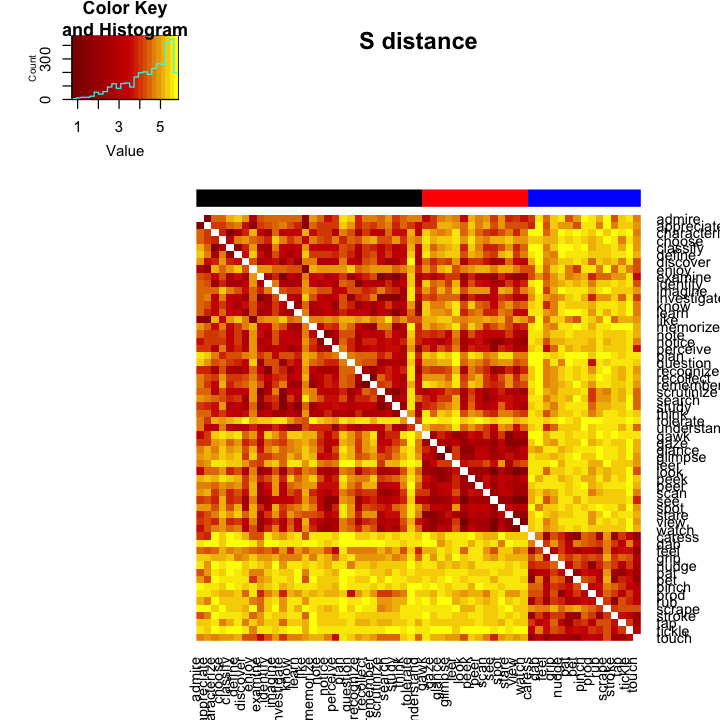

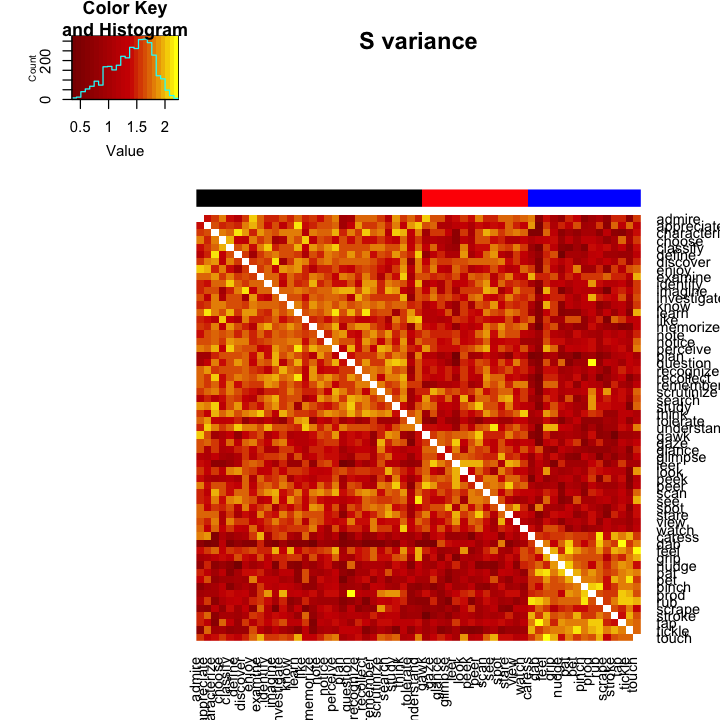

In [124]:
## HEATMAPS ----------------------- 

options(repr.plot.width=6, repr.plot.height=6)

groups = c("S")

for (group in groups){
  
  conditions = c("SightPerception","TouchPerception", "Amodal") 
  #conditions = c("SightEmission","SoundEmission") 
  #conditions = c("SightEmission","SoundEmission") 
  #conditions = c("SightEmission")
  #conditions = c("SightPerception")
  #conditions = c("SoundEmission","SoundAgent")
  #conditions = c("SightEmission","SoundEmission","SoundAgent")
  
  paste(conditions, sep="_",collapse = "_") -> c 
  
  #reload the verbs for the distance matrix 
  vnames <- dis.square[[c]]$verbs
  
  #in order of category  
  sort.int(as.character(vnames$C1),index.return = T) -> x 
  data.matrix(dis.square[[c]][[group]]) -> squaredata.disM
  diag(squaredata.disM) <- NA
  p <- heatmap.2(main = paste(group,"distance"), squaredata.disM[x$ix,x$ix],trace = 'none', dendrogram='none',ColSideColors=vnames$color[x$ix],Rowv=FALSE, Colv=FALSE, cexCol = 1.1, cexRow=1.1,col=colorRampPalette(c("darkred","red3","yellow"))(24))
  
  
  #variance 
  data.matrix(var.square[[c]][[group]]) -> squaredata.varM
  diag(squaredata.varM) <- NA
  pvar <- heatmap.2(main = paste(group,"variance"), squaredata.varM[x$ix,x$ix],trace = 'none', dendrogram='none',ColSideColors=vnames$color[x$ix],Rowv=FALSE, Colv=FALSE, cexCol = 1.1, cexRow=1.1,col=colorRampPalette(c("darkred","red3","yellow"))(24))
  
} 

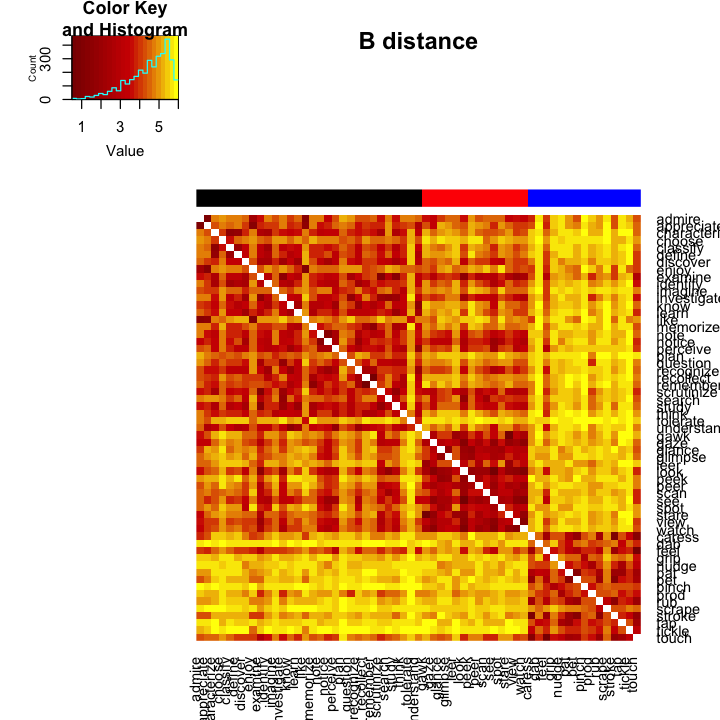

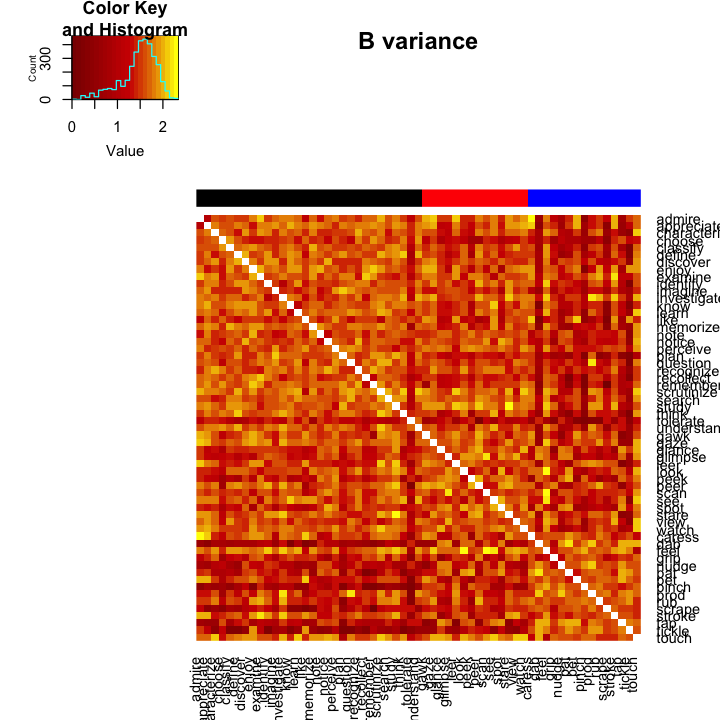

In [125]:
## HEATMAPS ----------------------- 

options(repr.plot.width=6, repr.plot.height=6)

groups = c("B")

for (group in groups){
  
  conditions = c("SightPerception","TouchPerception", "Amodal") 
  #conditions = c("SightEmission","SoundEmission") 
  #conditions = c("SightEmission","SoundEmission") 
  #conditions = c("SightEmission")
  #conditions = c("SightPerception")
  #conditions = c("SoundEmission","SoundAgent")
  #conditions = c("SightEmission","SoundEmission","SoundAgent")
  
  paste(conditions, sep="_",collapse = "_") -> c 
  
  #reload the verbs for the distance matrix 
  vnames <- dis.square[[c]]$verbs
  
  #in order of category  
  sort.int(as.character(vnames$C1),index.return = T) -> x 
  data.matrix(dis.square[[c]][[group]]) -> squaredata.disM
  diag(squaredata.disM) <- NA
  p <- heatmap.2(main = paste(group,"distance"), squaredata.disM[x$ix,x$ix],trace = 'none', dendrogram='none',ColSideColors=vnames$color[x$ix],Rowv=FALSE, Colv=FALSE, cexCol = 1.1, cexRow=1.1,col=colorRampPalette(c("darkred","red3","yellow"))(24))
  
  
  #variance 
  data.matrix(var.square[[c]][[group]]) -> squaredata.varM
  diag(squaredata.varM) <- NA
  pvar <- heatmap.2(main = paste(group,"variance"), squaredata.varM[x$ix,x$ix],trace = 'none', dendrogram='none',ColSideColors=vnames$color[x$ix],Rowv=FALSE, Colv=FALSE, cexCol = 1.1, cexRow=1.1,col=colorRampPalette(c("darkred","red3","yellow"))(24))
  
} 

# Sight compared to other categories: Do blind people distinguish verbs of seeing from perception verbs in other modalities?

A first key question is whether there are any differences in the category-level representation of perceptual experience verbs in blind and sighted people. If the overall meanings of these verbs reflect the first-person experience of speakers, we would expect the similarity space of blind individuals to reflect their lack of visual experience. For example, blind individuals might ignore the sensory modality of perceptual verbs, and treat verbs of seeing as referring to generic perceptual experiences. A phrase such as “I see his face” might be interpreted by a blind person as “I have become aware of his face.” Alternatively, they might treat them as referring to exploration in their dominate modality, tactile experiences. A final possibility is that both blind and sighted people treat amodal verbs as more similar to their dominate modality, such that blind people would treat amodal verbs as being more similar to touch verbs than sighted people, while sighted people would treat amodal as more similar to sight verbs. 



## Sight Perception vs Amodal Perception
 blind people distinguish between sight verbs and amodal verbs to the same extent as sighted people. 

In [21]:
#Anova 

conditions = c("SightPerception_SightPerception","Amodal_Amodal","Amodal_SightPerception" ) 

# get the selected data 
subsetdata <- subjdata[subjdata$SubCategory %in% conditions,]
subsetdata <- subsetdata[subsetdata$Group %in% groups,]
subsetdata <-na.omit(subsetdata)

#anova
ez <- ezANOVA(data=subsetdata,dv=.(mean),wid=.(subject),within=.(SubCategory), between=(Group))
for (x in 1:dim(ez$ANOVA)[1] ) {
  if(x==1){cat(conditions, "\n", sep=", ")}
  cat(ez$ANOVA[x,1],": F(",ez$ANOVA[x,2], "," , ez$ANOVA[x,3], ")=", round(ez$ANOVA[x,4],2), ", p=",round(ez$ANOVA[x,5],2), ", ƞ2=",round(ez$ANOVA[x,7],2), "\n",  sep="")  
}




Warning message:
: You have removed one or more Ss from the analysis. Refactoring "subject" for ANOVA.Warning message:
: You have removed one or more levels from variable "SubCategory". Refactoring for ANOVA.Warning message:
: You have removed one or more levels from variable "Group". Refactoring for ANOVA.Warning message:
: Data is unbalanced (unequal N per group). Make sure you specified a well-considered value for the type argument to ezANOVA().

SightPerception_SightPerception, Amodal_Amodal, Amodal_SightPerception, 
Group: F(1,44)=0.23, p=0.64, ƞ2=0
SubCategory: F(2,88)=122.7, p=0, ƞ2=0.36
Group:SubCategory: F(2,88)=0.09, p=0.91, ƞ2=0


## Sight Perception vs Touch Perception


blind people distinguish sight verbs from touch verbs to the same extent as sighted people

In [22]:
conditions = c("SightPerception_SightPerception","TouchPerception_TouchPerception", "SightPerception_TouchPerception" ) 

# get the selected data 
subsetdata <- subjdata[subjdata$SubCategory %in% conditions,]
subsetdata <- subsetdata[subsetdata$Group %in% groups,]
subsetdata <-na.omit(subsetdata)

# anova
ez <- ezANOVA(data=subsetdata,dv=.(mean),wid=.(subject),within=.(SubCategory), between=(Group))
for (x in 1:dim(ez$ANOVA)[1] ) {
  if(x==1){cat(conditions, "\n", sep=", ")}
  cat(ez$ANOVA[x,1],": F(",ez$ANOVA[x,2], "," , ez$ANOVA[x,3], ")=", round(ez$ANOVA[x,4],2), ", p=",round(ez$ANOVA[x,5],2), ", ƞ2=",round(ez$ANOVA[x,7],2), "\n",  sep="")  
}



Warning message:
: You have removed one or more Ss from the analysis. Refactoring "subject" for ANOVA.Warning message:
: You have removed one or more levels from variable "SubCategory". Refactoring for ANOVA.Warning message:
: You have removed one or more levels from variable "Group". Refactoring for ANOVA.Warning message:
: Data is unbalanced (unequal N per group). Make sure you specified a well-considered value for the type argument to ezANOVA().

SightPerception_SightPerception, TouchPerception_TouchPerception, SightPerception_TouchPerception, 
Group: F(1,44)=0.01, p=0.93, ƞ2=0
SubCategory: F(2,88)=187.31, p=0, ƞ2=0.57
Group:SubCategory: F(2,88)=0.32, p=0.73, ƞ2=0


## Default Modality for Amodal Perception

both blind and sighted treat amodal verbs as being more similar to sight verbs than touch verbs, despite differences in their primary modality.

In [23]:
#Anova 

conditions = c("Amodal_SightPerception","Amodal_TouchPerception") 

# get the selected data 
subsetdata <- subjdata[subjdata$SubCategory %in% conditions,]
subsetdata <- subsetdata[subsetdata$Group %in% groups,]
subsetdata <-na.omit(subsetdata)

#anova
ez <- ezANOVA(data=subsetdata,dv=.(mean),wid=.(subject),within=.(SubCategory), between=(Group))
for (x in 1:dim(ez$ANOVA)[1] ) {
  if(x==1){cat(conditions, "\n", sep=", ")}
  cat(ez$ANOVA[x,1],": F(",ez$ANOVA[x,2], "," , ez$ANOVA[x,3], ")=", round(ez$ANOVA[x,4],2), ", p=",round(ez$ANOVA[x,5],2), ", ƞ2=",round(ez$ANOVA[x,7],2), "\n",  sep="")  
}



Warning message:
: You have removed one or more Ss from the analysis. Refactoring "subject" for ANOVA.Warning message:
: You have removed one or more levels from variable "SubCategory". Refactoring for ANOVA.Warning message:
: You have removed one or more levels from variable "Group". Refactoring for ANOVA.Warning message:
: Data is unbalanced (unequal N per group). Make sure you specified a well-considered value for the type argument to ezANOVA().

Amodal_SightPerception, Amodal_TouchPerception, 
Group: F(1,44)=0.13, p=0.72, ƞ2=0
SubCategory: F(1,44)=147.67, p=0, ƞ2=0.21
Group:SubCategory: F(1,44)=1.2, p=0.28, ƞ2=0


## Summary Plot

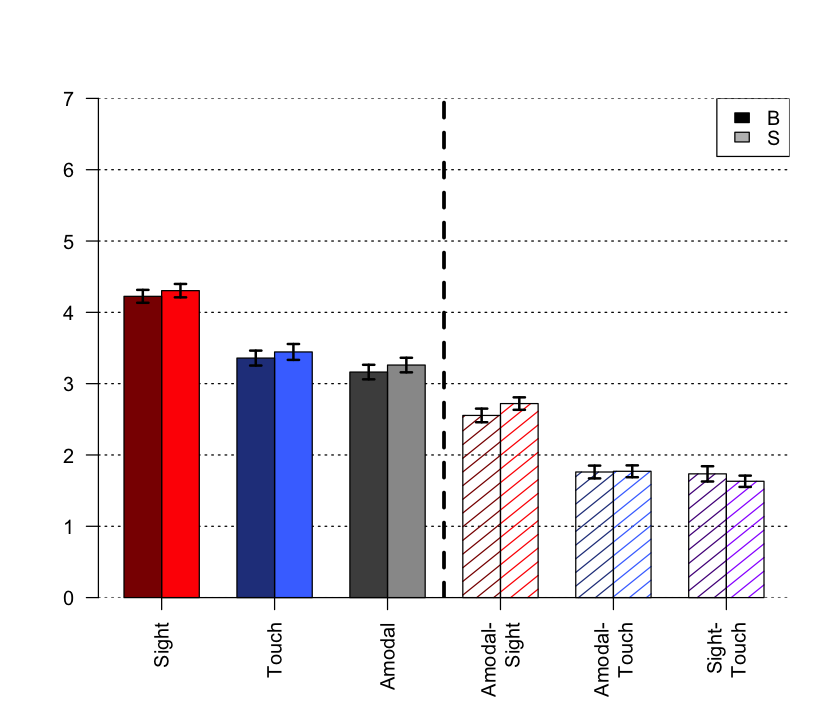

In [24]:
#plot for all group-level comparisons 

conditions = c("SightPerception_SightPerception","TouchPerception_TouchPerception","Amodal_Amodal", "Amodal_SightPerception","Amodal_TouchPerception","SightPerception_TouchPerception") 

plotdata = groupdata[groupdata$Group %in% groups, ]
#get data from conditions of interest 
meansD = plotdata[plotdata$SubCategory %in% conditions,]$mean
sesD = plotdata[plotdata$SubCategory %in% conditions,]$se
namesD = plotdata[plotdata$SubCategory %in% conditions,]$SubCategory

meansD <- meansD[order(match(namesD,conditions))]
sesD <- sesD[order(match(namesD,conditions))]
namesD <- namesD[order(match(namesD,conditions))]

namesD = sub(pattern="_",":",namesD)
namesD = sub(pattern="SoundEmission","SoundIn",namesD);namesD = sub(pattern="SoundEmission","SoundIn",namesD)
namesD = sub(pattern="SoundAgent","SoundAn",namesD);namesD = sub(pattern="SoundAgent","SoundAn",namesD)
namesD = sub(pattern="Emission","",namesD);namesD = sub(pattern="Emission","",namesD)
namesD = sub(pattern="Perception","",namesD);namesD = sub(pattern="Perception","",namesD)

namesD <- gsub("([^*.]*.).\\1", "\\1",namesD)
namesD <- gsub(":","-\n",namesD)

options(repr.plot.width=7, repr.plot.height=6)

mp<-barplot2(meansD, beside = TRUE,horiz=FALSE,
             col = c("red4","red1","royalblue4","royalblue1","grey30","grey60","red4","red1","royalblue4","royalblue1","purple4","purple1"),
             axes = TRUE,
             space = rep(c(1,0),length(conditions)),
             density  = c(-1,-1,-1,-1,-1, -1, 10, 10, 10,10,10,10),
             # names.arg = namesD,
             cex.names = 1.1, 
             ylim = c(0,7),
             #ylab = "PSC",
             cex.lab = 1.2,
             cex.axis = 1,
             las = 1,
             #main = "Pixar in RTPJ", font.main = 2,
             border = "black",
             plot.ci = TRUE, ci.lwd =2, ci.width = .3, ci.l = meansD-sesD/2, ci.u = meansD+sesD/2,
             # grid.inc = 4,
             plot.grid = TRUE)
axis(1,labels=namesD[c(T,F)],at=mp[c(T,F)]+.5,las=3,cex.axis=1)
legend("topright",fill = c("black","gray"),legend = groups)
abline(v = 9.5,col="black",lty=2,lwd =3)

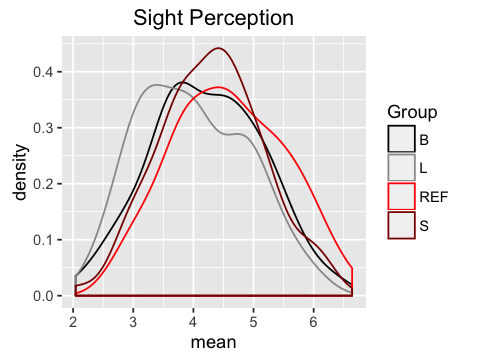

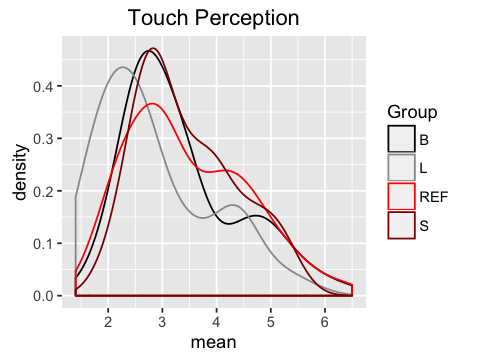

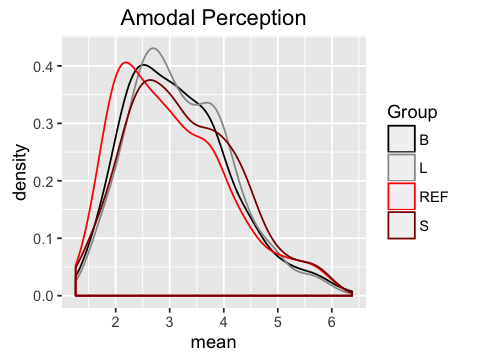

In [25]:
#Look at the distribution
options(repr.plot.width=4, repr.plot.height=3)
#ggplot(verbdata, aes(x=mean,color=Group, subset = (Category %in% c("Experience")))) + geom_density()

ggplot(verbdata[verbdata$SubCategory=="SightPerception_SightPerception",], aes(x=mean,color=Group)) + geom_density() + scale_colour_manual(values=c("black","gray60","red1","red4")) + ggtitle("Sight Perception")
ggplot(verbdata[verbdata$SubCategory=="TouchPerception_TouchPerception",], aes(x=mean,color=Group)) + geom_density() + scale_colour_manual(values=c("black","gray60","red1","red4")) + ggtitle("Touch Perception")
ggplot(verbdata[verbdata$SubCategory=="Amodal_Amodal",], aes(x=mean,color=Group)) + geom_density() + scale_colour_manual(values=c("black","gray60","red1","red4")) + ggtitle("Amodal Perception")


#ggplot(verbdata, aes(x=mean,color=Group)) + geom_histogram() + facet_grid(Group ~ .)
#ggplot(verbdata, aes(y=mean,x=SubCategory, fill=Group,alpha=.1)) + geom_dotplot(binaxis="y", stackdir="center", binwidth=0.15) + labs(title="Dot plots") + facet_grid(Group ~ .)




### Single Words 
averaging across many verbs in a category could obscure subtle differences in representations, we also looked at how sighted and blind adults represented single items in relationship to these broad categories; for example, does a blind person treat to see as overall more similar to tactile verbs than sighted people do?


	Welch Two Sample t-test

data:  worddata[worddata$SubCategory == "Sight" & worddata$Group ==  and worddata[worddata$SubCategory == "Sight" & worddata$Group ==     "B", ]$mean and     "S", ]$mean
t = -0.71384, df = 43.821, p-value = 0.4791
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6861004  0.3272231
sample estimates:
mean of x mean of y 
 4.775107  4.954545 



	Welch Two Sample t-test

data:  worddata[worddata$SubCategory == "Amodal" & worddata$Group ==  and worddata[worddata$SubCategory == "Amodal" & worddata$Group ==     "B", ]$mean and     "S", ]$mean
t = -1.0994, df = 43.393, p-value = 0.2777
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9002688  0.2649239
sample estimates:
mean of x mean of y 
 3.148994  3.466667 



	Welch Two Sample t-test

data:  worddata[worddata$SubCategory == "Touch" & worddata$Group ==  and worddata[worddata$SubCategory == "Touch" & worddata$Group ==     "B", ]$mean and     "S", ]$mean
t = 0.22805, df = 42.636, p-value = 0.8207
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5148213  0.6460623
sample estimates:
mean of x mean of y 
 1.868651  1.803030 


Warning message:
: You have removed one or more Ss from the analysis. Refactoring "subject" for ANOVA.Warning message:
: Converting "SubCategory" to factor for ANOVA.Warning message:
: You have removed one or more levels from variable "Group". Refactoring for ANOVA.Warning message:
: Data is unbalanced (unequal N per group). Make sure you specified a well-considered value for the type argument to ezANOVA().

to_see, 
Group: F(1,44)=0.43, p=0.51, ƞ2=0.01
SubCategory: F(2,88)=202.41, p=0, ƞ2=0.64
Group:SubCategory: F(2,88)=0.83, p=0.44, ƞ2=0.01


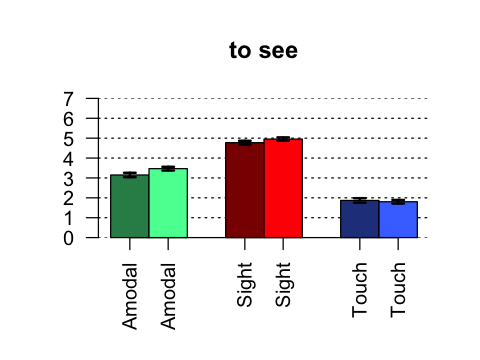

In [26]:
#### SINGLE WORDS ##### 

word = "to_see"
word_amodal1 = datamelt[datamelt$V1==word & datamelt$C2=="Amodal",]
word_amodal2 = datamelt[datamelt$V2==word & datamelt$C1=="Amodal",]
word_amodal = rbind(word_amodal1,word_amodal2)
word_amodal$Cond <- "Amodal"

word_touch1 = datamelt[datamelt$V1==word & datamelt$C2=="TouchPerception",]
word_touch2 = datamelt[datamelt$V2==word & datamelt$C1=="TouchPerception",]
word_touch = rbind(word_touch1,word_touch2)
word_touch$Cond <- "Touch"

word_sight1 = datamelt[datamelt$V1==word & datamelt$C2=="SightPerception",]
word_sight2 = datamelt[datamelt$V2==word & datamelt$C1=="SightPerception",]
word_sight = rbind(word_sight1,word_sight2)
word_sight$Cond <- "Sight"

word_contrast <- rbind(word_sight, word_amodal,word_touch)

#get means and std per subject/condition (collapsing across verb pairs)
worddata <- aggregate(word_contrast$value,list(word_contrast$subject, word_contrast$Group, word_contrast$Cond), FUN= function(x) c(m=mean(x, na.rm=TRUE), sd=sd(x, na.rm=TRUE)))
worddata$x[,1] -> worddata$mean
worddata$x[,2] -> worddata$sd
worddata$x <- NULL
names(worddata) <- c("subject", "Group", "SubCategory", "mean", "sd")

groupworddata <- aggregate(worddata$mean,list(worddata$Group, worddata$SubCategory), FUN= function(x) c(m=mean(x, na.rm=TRUE), s=std.error(x, na.rm=TRUE)))
groupworddata$x[,1] -> groupworddata$mean
groupworddata$x[,2] -> groupworddata$se
groupworddata$x <- NULL
names(groupworddata) <- c("Group", "SubCategory", "mean", "se")

#write summary statistcs for each group
groupworddata$mean -> temp
for (x in 1:dim(groupworddata)[1] ) {
  temp[x] <- paste(round(groupworddata$mean[x],2), "±", round(groupworddata$se[x],2),  sep="")  
}
groupworddata$summary <- temp 


plotdata = groupworddata[groupworddata$Group %in% groups, ]
#get data from conditions of interest 
meansD = plotdata$mean
sesD = plotdata$se
namesD = plotdata$SubCategory

mp<-barplot2(meansD, beside = TRUE,horiz=FALSE,
             col = c("seagreen4","seagreen1","red4","red1","royalblue4","royalblue1"),
             axes = TRUE,
             space = rep(c(1,0),length(meansD)/2),
             cex.names = 1.1, 
             ylim = c(0,7),
             cex.lab = 1.2,
             cex.axis = 1,
             las = 1,
             main = sub(pattern = "_",replacement = " ",x = word), font.main = 2,
             border = "black",
             plot.ci = TRUE, ci.lwd =2, ci.width = .3, ci.l = meansD-sesD/2, ci.u = meansD+sesD/2,
             plot.grid = TRUE)
axis(1,labels=namesD,at=mp,las=3,cex.axis=1)


t.test(worddata[worddata$SubCategory=="Sight" & worddata$Group == "B",]$mean, worddata[worddata$SubCategory=="Sight" & worddata$Group == "S",]$mean)
t.test(worddata[worddata$SubCategory=="Amodal" & worddata$Group == "B",]$mean, worddata[worddata$SubCategory=="Amodal" & worddata$Group == "S",]$mean)
t.test(worddata[worddata$SubCategory=="Touch" & worddata$Group == "B",]$mean, worddata[worddata$SubCategory=="Touch" & worddata$Group == "S",]$mean)

#anova
worddata_subset <- worddata[ worddata$Group %in% groups &  (worddata$SubCategory == "Amodal" | worddata$SubCategory == "Touch" | worddata$SubCategory == "Sight") & !is.na(worddata$sd),]
ez <- ezANOVA(data=worddata_subset,dv=.(mean),wid=.(subject),within=.(SubCategory), between=(Group))
for (x in 1:dim(ez$ANOVA)[1] ) {
  if(x==1){cat(word, "\n", sep=", ")}
  cat(ez$ANOVA[x,1],": F(",ez$ANOVA[x,2], "," , ez$ANOVA[x,3], ")=", round(ez$ANOVA[x,4],2), ", p=",round(ez$ANOVA[x,5],2), ", ƞ2=",round(ez$ANOVA[x,7],2), "\n",  sep="")  
}



## Label Free: perception verbs in other modalities

### Hierarchical Clustering

Ward's minimum variance criterion, which merges clusters such that the total within-cluster variance is minimized (relative to other possible merges). Within-cluster variance is a weighted squared distance between cluster centers. The tree is built from the bottom up: each verb is originally assigned to its own cluster, and at each step, the two clusters that are "closest" -- those whose merged result has a least variance -- are merged to form a larger cluster. Distances between clusters were recomputed by the Lance–Williams dissimilarity update formula. At each stage two clusters that are closest are joined to form a new, larger cluster (eventually resulting in a single cluster). This tends to lead to compact and spherical clusters. The closer of the two clusters that are merged together are on the left on the plot.  

Warning message:
: 'plclust' is deprecated.
Use 'plot' instead.
See help("Deprecated")Warning message:
: 'plclust' is deprecated.
Use 'plot' instead.
See help("Deprecated")

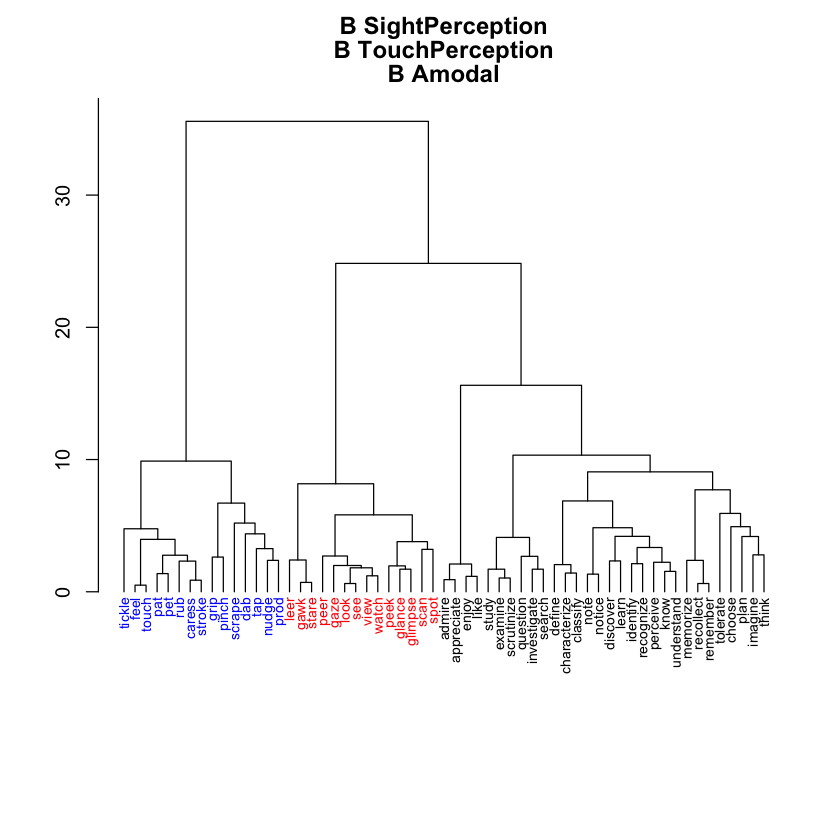

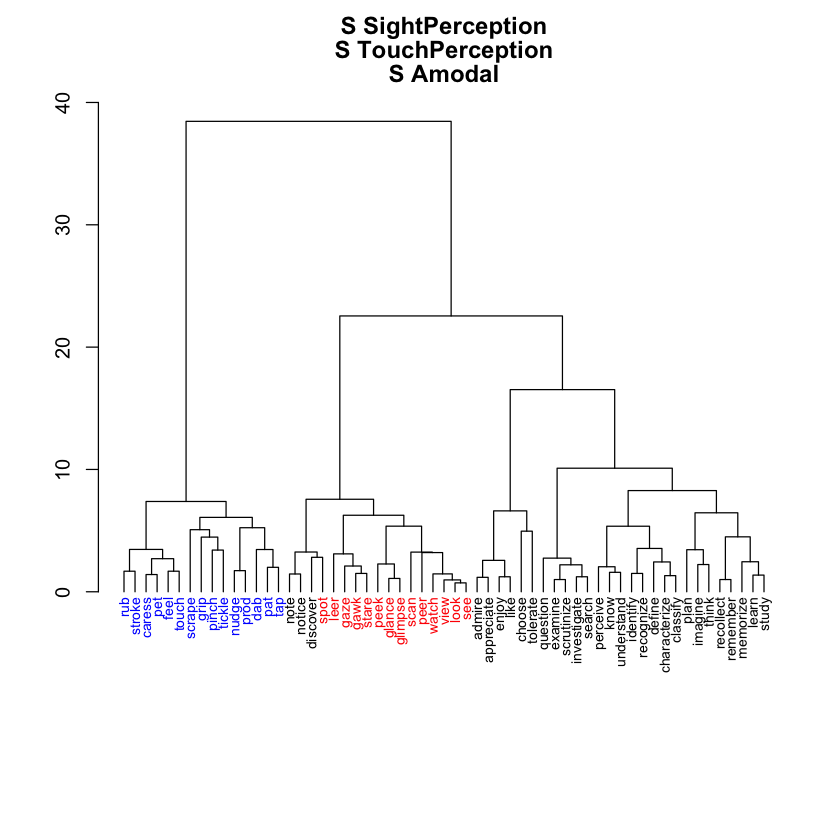

In [27]:
conditions = c("SightPerception","TouchPerception", "Amodal") 
paste(conditions, sep="_",collapse = "_") -> c 

options(repr.plot.width=7, repr.plot.height=7)

for (group in groups){
  
  #whole group
  hclust(as.dist(dis.square[[c]][[group]]),method='ward.D') -> hc 
  
  ### colored, with option to rotate labels, and height isn't all the way down  
  col.vec = vnames$color  #make the colors 
  label.vec = vnames$V1  #make the labels 
  
  ht.vec<-rep(NA,nrow(vnames))
  for(i in 1:nrow(vnames))
  {
    loc<-which(hc$merge==-i)
    row.loc<-loc%%(nrow(vnames)-1)
    ht.vec[i]<-hc$height[row.loc] 
  }
  hang<- ht.vec
  ht.vec2<-ht.vec-hang-.4
  plclust(hc,labels=rep("                 ",nrow(vnames)),hang=-10, ann=FALSE)  ##turning off the labels
  text(seq(1,nrow(vnames)),ht.vec2[hc$order],labels=label.vec[hc$order],col=col.vec[hc$order],srt=90,adj=c(1,.5),cex=.7)
  
  title(paste(group,conditions))
  #cbind(hc.sighted$merge,  hc.blind$merge)
} 

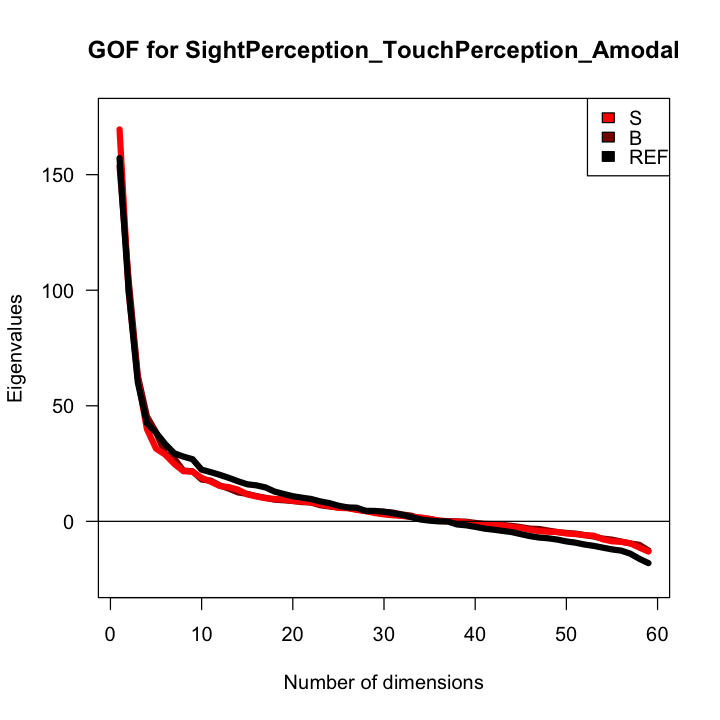

In [28]:
conditions = c("SightPerception","TouchPerception", "Amodal") 
paste(conditions, sep="_",collapse = "_") -> c 

xS <- cmdscale(dis.square[[c]][["S"]],1,eig=T)
xB <- cmdscale(dis.square[[c]][["B"]],1,eig=T)
xR <- cmdscale(dis.square[[c]][["REF"]],1,eig=T)

# Plot the eigenvalues and choose the correct number of dimensions (eigenvalues close to 0)
options(repr.plot.width=6, repr.plot.height=6)
plot(c(xB$eig),
     type="l", lwd=5, las=1, col="darkred",
     xlab="Number of dimensions", 
     ylab="Eigenvalues",
     ylim =c(-25,175))
lines(xS$eig, col="red",lwd=5, las=1)
lines(xR$eig, col="black",lwd=5, las=1)
abline(h=0)    
legend("topright", legend = c("S","B","REF"),fill =c("red","darkred","black"))
title(paste("GOF for",c),cex=.5)

### cluster reliability

To assess the reliability of these clusters, we used multiscale bootstrap resampling, using the pvclust package in R (http://www.sigmath.es.osaka-u.ac.jp/shimo-lab/prog/pvclust/), resampling over specific verb pairs. This algorithm is a computationally fast way of implementing standard double-bootstrap, in which the standard error of each bootstrap replication is estimated using bootstrap resampling within the resampled replication.

Bootstrap (r = 0.5)... Done.
Bootstrap (r = 0.58)... Done.
Bootstrap (r = 0.69)... Done.
Bootstrap (r = 0.78)... Done.
Bootstrap (r = 0.89)... Done.
Bootstrap (r = 1.0)... Done.
Bootstrap (r = 1.08)... Done.
Bootstrap (r = 1.19)... Done.
Bootstrap (r = 1.28)... Done.
Bootstrap (r = 1.39)... Done.
Bootstrap (r = 0.5)... Done.
Bootstrap (r = 0.58)... Done.
Bootstrap (r = 0.69)... Done.
Bootstrap (r = 0.78)... Done.
Bootstrap (r = 0.89)... Done.
Bootstrap (r = 1.0)... Done.
Bootstrap (r = 1.08)... Done.
Bootstrap (r = 1.19)... Done.
Bootstrap (r = 1.28)... Done.
Bootstrap (r = 1.39)... Done.


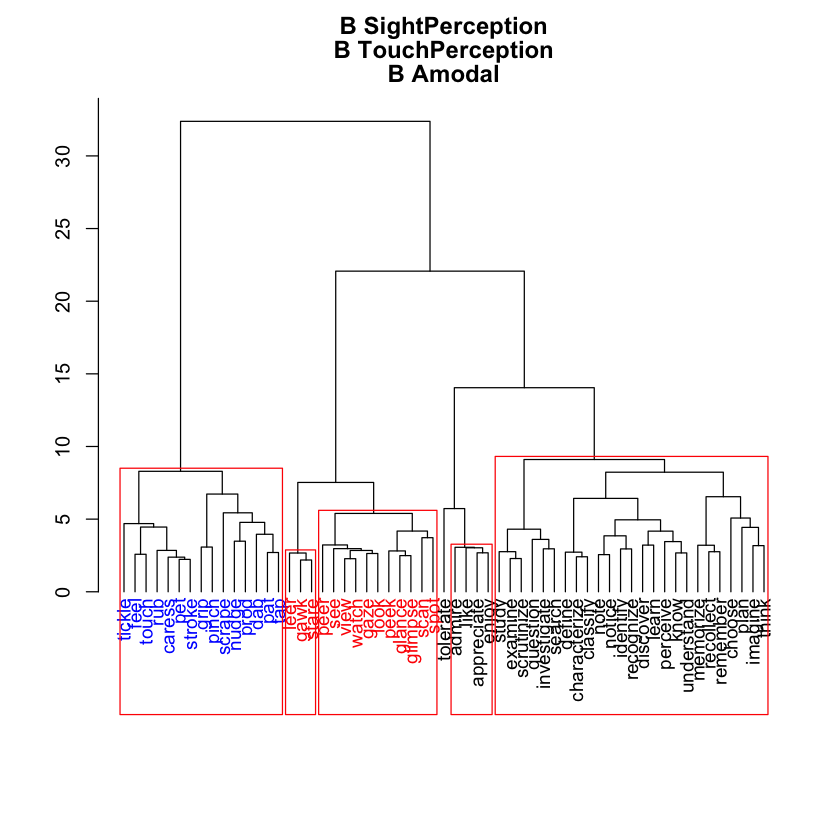

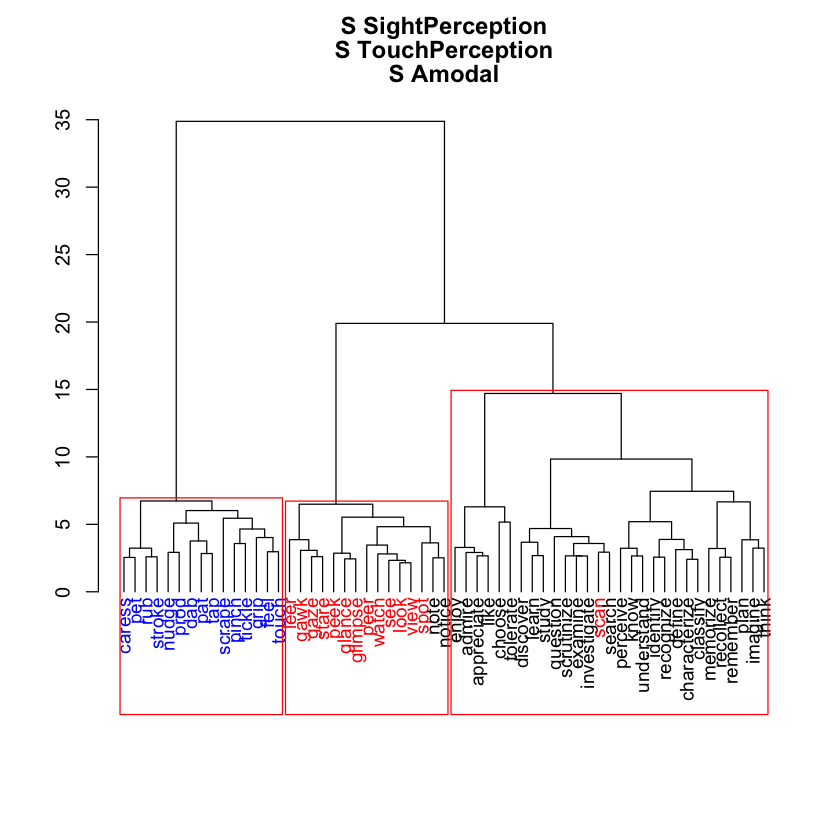

In [29]:
conditions = c("SightPerception","TouchPerception", "Amodal") 
paste(conditions, sep="_",collapse = "_") -> c 

for (group in groups){
  
  # Ward Hierarchical Clustering with Bootstrapped p values
  # Compute the eigenvalues
  x <- cmdscale(dis.square[[c]][[group]],1,eig=T)
  dims = 36
  
  # Recover the coordinates that give the same distance matrix with the correct number of dimensions    
  x <- cmdscale(dis.square[[c]][[group]],dims)
  fit <- pvclust(t(x), method.hclust='ward.D', method.dist="euclidean")
  #plot(fit,col=vnames$color, cex = .7, cex.pv = .5, col.pv = c("green",rgb(0, 0, 0, 0),rgb(0, 0, 0, 0)), print.num=F, print.pv=T) # dendogram with p values
  
        
  
  ### colored, with option to rotate labels, and height isn't all the way down  
  options(repr.plot.width=7, repr.plot.height=7)
  col.vec = vnames$color  #make the colors 
  label.vec = vnames$V1  #make the labels 
  
  ht.vec<-rep(NA,nrow(vnames))
  for(i in 1:nrow(vnames))
  {
    loc<-which(fit$hclust$merge==-i)
    row.loc<-loc%%(nrow(vnames)-1)
    ht.vec[i]<-fit$hclust$height[row.loc] 
  }
  hang<- ht.vec
  ht.vec2<-ht.vec-hang-.4
  plot(fit$hclust,labels=rep("                 ",nrow(vnames)),hang=-10, ann=FALSE)  ##turning off the labels
  text(seq(1,nrow(vnames)),ht.vec2[fit$hclust$order],labels=label.vec[fit$hclust$order],col=col.vec[fit$hclust$order],srt=90,adj=c(1,.5),cex=.95)
  title(paste(group,conditions))
  pvrect(fit, alpha=.90,)
  #text(fit, col=c("black",rgb(0, 0, 0, 0),rgb(0, 0, 0, 0)), print.num=F, print.pv=F, cex=.6, font=NULL)
  
} 

## MDS 

Indivudal level differences

In [30]:
## INDSCAL for all participants  ------------------------------------------------------

groups = c("B","S")
conditions = c("SightPerception","TouchPerception", "Amodal") 
#conditions = c("SightEmission","SoundEmission") 
#conditions = c("SightEmission","SoundEmission") 
#conditions = c("SightEmission")
#conditions = c("SightPerception")
#conditions = c("SoundEmission","SoundAgent")
#conditions = c("SightEmission","SoundEmission","SoundAgent")

paste(conditions, sep="_",collapse = "_") -> c 


for (group in groups){
  
  #get rid of the participants with missing data 
  ### BETTER WAY IS TO SET THE WEIGHT MATRIX TO 0!!  
  temp <- subj.dis.square[[c]][sapply(subj.dis.square[[c]],function(x) !any(is.na(x)))]
  temp<-temp[grepl(group[1],names(temp))]
  temp <- lapply(temp,function(x) as.dist(x))
  
  #because otherwise it was droppping folks... 
  temp2 <- temp[c(1:length(temp))]
  
  #Non-metric to avoid assumptions about linear distance 
  IDS.space <- smacofIndDiff(temp2,constraint="indscal",ndim=10,itmax = 1000, type ="ordinal" )
  
  if(group=="S")
  {IDS.space -> IDS.space.sighted}
  if(group=="B")
  {IDS.space -> IDS.space.blind}
  
}


Warning message:
In smacofIndDiff(temp2, constraint = "indscal", ndim = 10, itmax = 1000, : Iteration limit reached! Increase itmax argument!Warning message:
In smacofIndDiff(temp2, constraint = "indscal", ndim = 10, itmax = 1000, : Iteration limit reached! Increase itmax argument!

ERROR: Error in options(repr.plot.width = 7, repr.plot.height = ): argument is missing, with no default


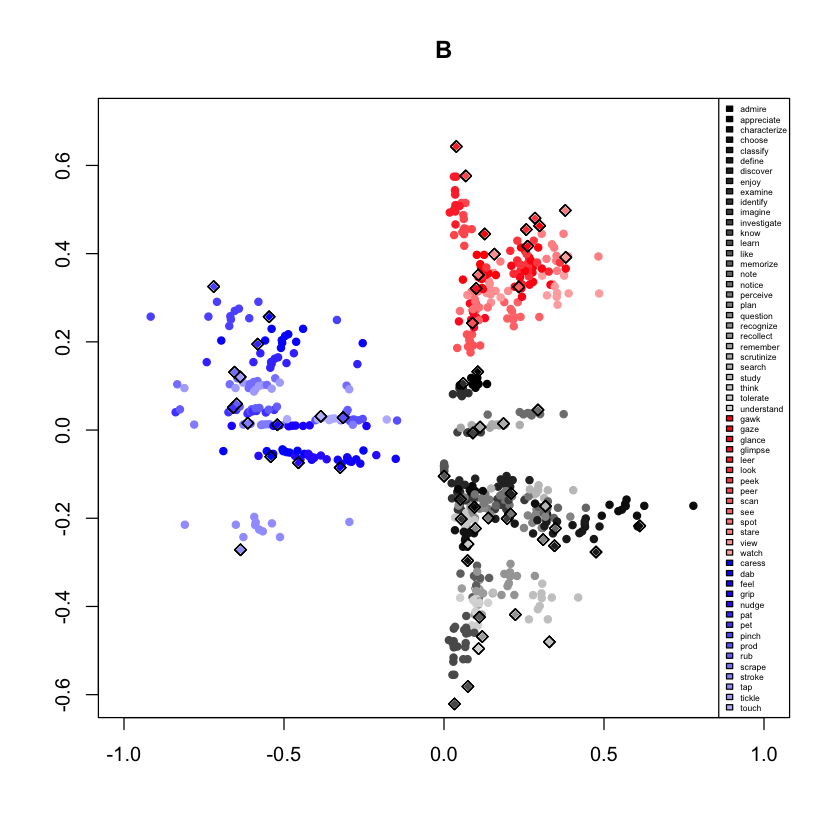

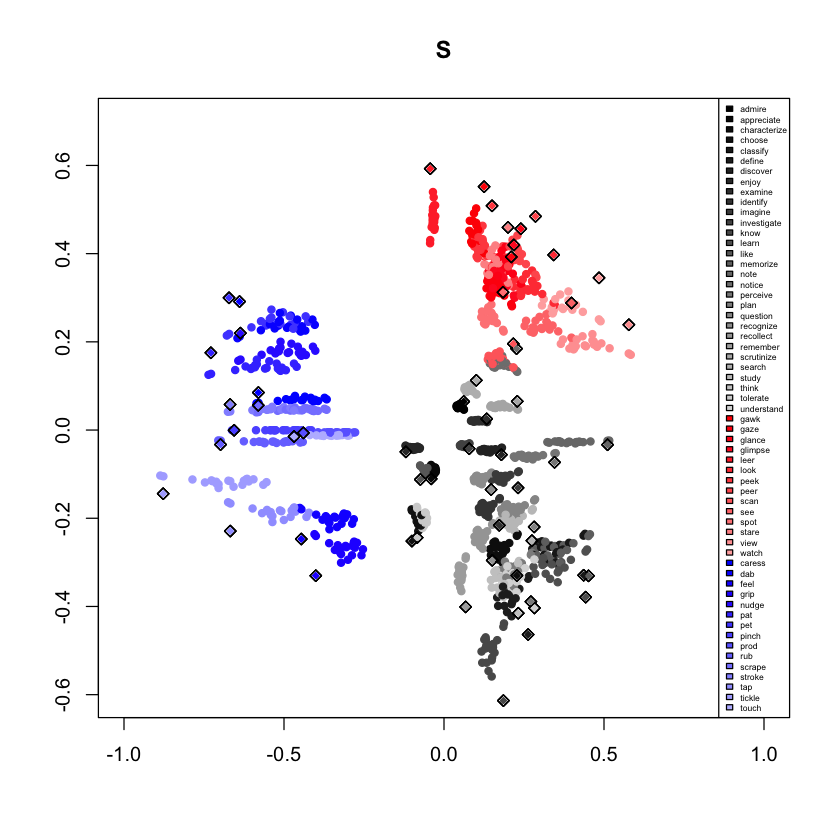

In [31]:
#graph

options(repr.plot.width=7, repr.plot.height=7)

for (group in groups){
  dim1<-1; dim2<-2; dim3<-3
  
  if(group=="S")
  {IDS.space <- IDS.space.sighted}
  if(group=="B")
  {IDS.space <- IDS.space.blind}
  
  x1 <- IDS.space$gspace[,dim1]; y1 <- IDS.space$gspace[,dim2]; z1 <- IDS.space$gspace[,dim3]
  
  subjcol=rainbow(length(IDS.space$conf),v =1, alpha=1)
  
  colfunc <- colorRampPalette(c("red", "white")); reds <- colfunc(20)
  colfunc <- colorRampPalette(c("blue", "white")); blues <- colfunc(20)
  colfunc <- colorRampPalette(c("black", "white")); blacks <- colfunc(35)
  
  vnames$color2 <- NA 
  vnames[vnames$color == "red",]$color2 <- reds[1:length(vnames[vnames$color == "red",]$color)]
  vnames[vnames$color == "blue",]$color2 <- blues[1:length(vnames[vnames$color == "blue",]$color)]
  vnames[vnames$color == "black",]$color2 <- blacks[1:length(vnames[vnames$color == "black",]$color)]
  
  ifelse(group=="S",1,-1) -> flip
  plot(flip*x1, y1, type="n", xlab="", ylab="", main=paste(group), ylim = c(-.6,.7), xlim = c(-1,1))
  for(s in 1:length(IDS.space$conf)){
    x <- flip*IDS.space$conf[[s]][,dim1]
    y <- IDS.space$conf[[s]][,dim2]
    
    if(grepl("S",names(temp2)[s])){
      points(x, y,pch=19, col=vnames$color2,cex=.8)}
    
    
    if(grepl("B",names(temp2)[s])){
      points(x, y,pch=19, col=vnames$color2,cex=.8)}
  }
  
  #text(x1,y1, names(x1), cex=.7, col=(rainbow(59,v=1, alpha=.6)))
  #text(x1,y1, names(x1), cex=.7, col= vnames$color2 ,font=2)
  points(flip*x1, y1,pch=5, col="black",cex=.9);points(flip*x1, y1,pch=5, col="black",cex=.9);points(flip*x1, y1,pch=5, col="black",cex=.9);points(flip*x1, y1,pch=5, col="black",cex=.9);
  points(flip*x1, y1,pch=18, col=vnames$color2,cex=.8);points(flip*x1, y1,pch=18, col=vnames$color2,cex=.8);points(flip*x1, y1,pch=18, col=vnames$color2,cex=.8);points(flip*x1, y1,pch=18, col=vnames$color2,cex=.8);
  #text(x1,y1, names(x1), cex=.7, col=("black"),adj=-.5)
  
  vnames2<-vnames[with(vnames, order(C1, V1)), ]
  
  legend("bottomright",legend = vnames2$V1, fill=vnames2$color2,cex = .43) 
}

In [32]:
#WHOLE GROUP 

#get rid of the participants with missing data 
temp <- subj.dis.square[[c]][sapply(subj.dis.square[[c]],function(x) !any(is.na(x)))]
temp<-temp[grepl("S",names(temp)) | grepl("B",names(temp))]
temp <- lapply(temp,function(x) as.dist(x))

#because otherwise it was droppping folks... 
temp2 <- temp[c(1:length(temp))]

#Non-metric to avoid assumptions about linear distance 
IDS.space.group <- smacofIndDiff(temp2,constraint="indscal",ndim=10,itmax = 1000, type = "ordinal")



Warning message:
In smacofIndDiff(temp2, constraint = "indscal", ndim = 10, itmax = 1000, : Iteration limit reached! Increase itmax argument!

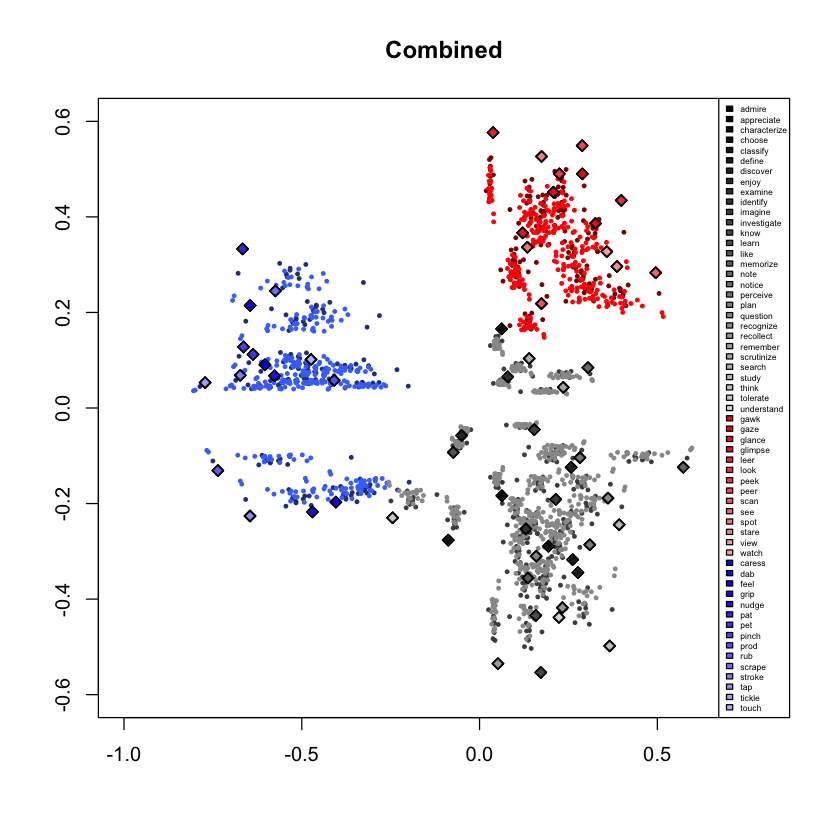

In [33]:
#graph
dim1<-1; dim2<-2; dim3<-3
x1 <- IDS.space.group$gspace[,dim1]; y1 <- IDS.space.group$gspace[,dim2]; z1 <- IDS.space.group$gspace[,dim3]

#col = c("red4","red1","royalblue4","royalblue1","grey30","grey60","red4","red1","royalblue4","royalblue1","purple4","purple1"),

vnames$colorS <- NA 
vnames[vnames$color == "red",]$colorS <- "red1"
vnames[vnames$color == "blue",]$colorS <- "royalblue1"
vnames[vnames$color == "black",]$colorS <- "grey60"

vnames$colorB <- NA 
vnames[vnames$color == "red",]$colorB <- "red4"
vnames[vnames$color == "blue",]$colorB <- "royalblue4"
vnames[vnames$color == "black",]$colorB <- "grey30"


plot(flip*x1, y1, type="n", xlab="", ylab="", main="Combined", ylim = c(-.6,.6), xlim = c(-1,.8))
for(subj in 1:length(IDS.space.group$conf)){
  x <- flip*IDS.space.group$conf[[subj]][,dim1]
  y <- IDS.space.group$conf[[subj]][,dim2]
  
  if(grepl("S",names(temp2)[subj])){
    points(x, y,pch=19, col=vnames$colorS,cex=.4)}
  
  if(grepl("B",names(temp2)[subj])){
    points(x, y,pch=19, col=vnames$colorB,cex=.4,)}
  
}


#text(x1,y1, names(x1), cex=.7, col= vnames$color2 ,font=2)
points(flip*x1, y1,pch=5, col="black",cex=.6);points(flip*x1, y1,pch=5, col="black",cex=.9);points(flip*x1, y1,pch=5, col="black",cex=.9);points(flip*x1, y1,pch=5, col="black",cex=.9);
points(flip*x1, y1,pch=18, col=vnames$color2,cex=.5);points(flip*x1, y1,pch=18, col=vnames$color2,cex=.8);points(flip*x1, y1,pch=18, col=vnames$color2,cex=.8);points(flip*x1, y1,pch=18, col=vnames$color2,cex=.8);

vnames2<-vnames[with(vnames, order(C1, V1)), ]
legend("bottomright",legend = vnames2$V1, fill=vnames2$color2,cex = .43)



	Welch Two Sample t-test

data:  stress[grepl("S", stress$names), ]$data and stress[grepl("B", stress$names), ]$data
t = -0.10648, df = 28.359, p-value = 0.9159
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3498982  0.3152995
sample estimates:
mean of x mean of y 
 1.535882  1.553181 


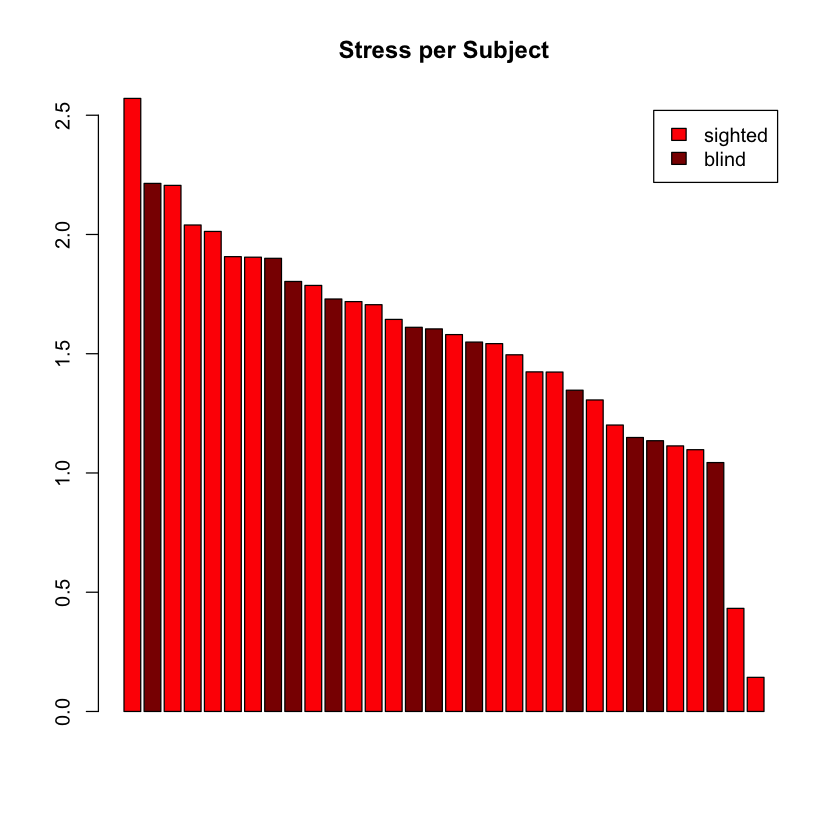

In [114]:
#Get the stress per subject 

options(repr.plot.width=7, repr.plot.height=7)


stress<-NULL
matrix(IDS.space.group$sps[,1]) -> stress$data
names(IDS.space.group$sps[,1]) -> stress$names
as.data.frame(stress) -> stress
stress$color <- NA

stress[grepl( "S", stress$names),]$color <- "red1"
stress[grepl( "B", stress$names),]$color <- "red4"

barplot(sort(stress$data,decreasing = T), main = "Stress per Subject", col = stress$color[order(stress$data,decreasing = T)], legend.text = c("sighted","blind"))

t.test(stress[grepl( "S", stress$names),]$data, stress[grepl( "B", stress$names),]$data)


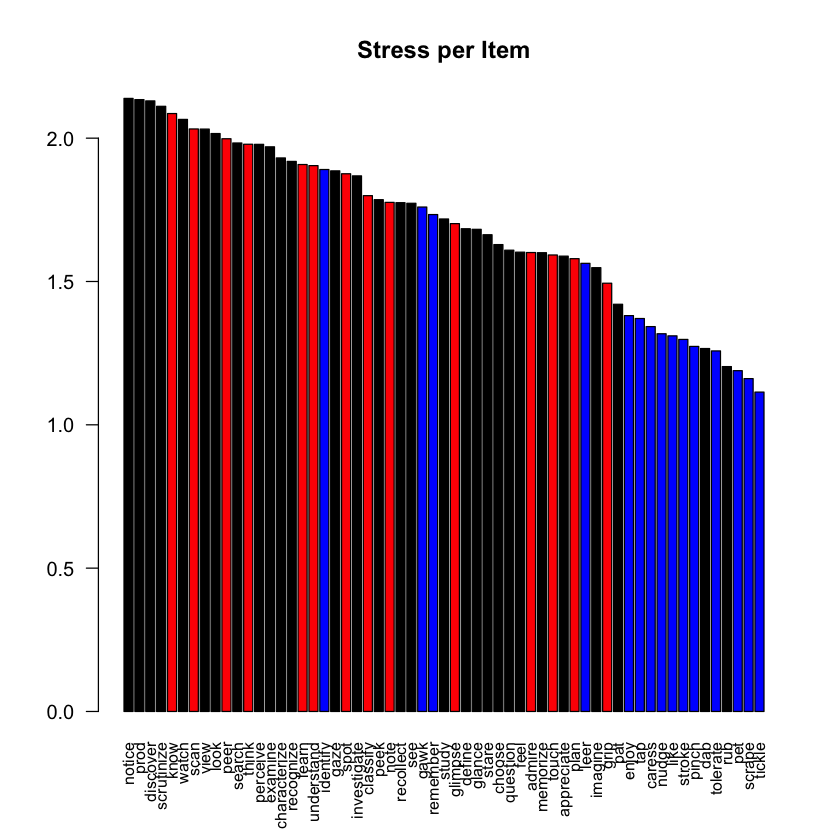

In [35]:
#get the stress per item 
sorted <- sort(IDS.space.group$spp, decreasing = TRUE)
sortedcol <- vnames$color[order(IDS.space.group$spp, decreasing = TRUE)]
barplot(sort(IDS.space$spp, decreasing = TRUE), main = paste("Stress per Item"), cex.names = .8,las=2, col=sortedcol) #,ylim=c(0,.6)) 



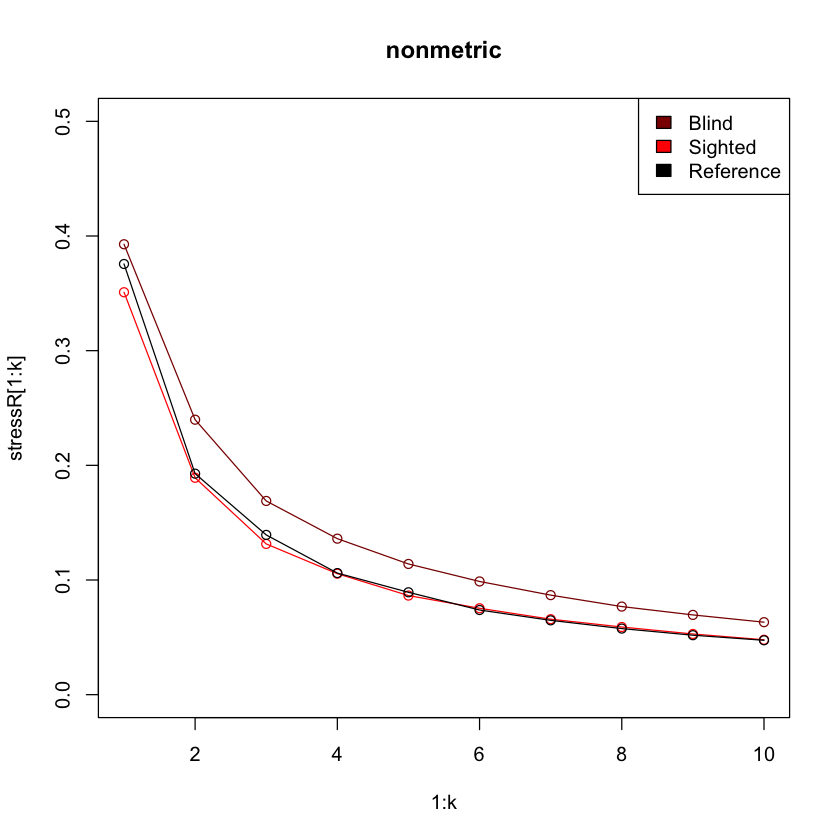

In [36]:
k=10
#graph "scree" gof elbow nnometric 
result<-vector("list",k)
for (i in 1:k){
  result[[i]]<- smacofSym(as.dist(dis.square[[c]][["S"]]), i, type="ordinal")
}
stressS<- sapply(result, function(x) x$stress)

result<-vector("list",k)
for (i in 1:k){
  result[[i]]<- smacofSym(as.dist(dis.square[[c]][["REF"]]), i, type="ordinal")
}
stressR<- sapply(result, function(x) x$stress)

result<-vector("list",k)
for (i in 1:k){
  result[[i]]<- smacofSym(as.dist(dis.square[[c]][["B"]]), i, type="ordinal")
}
stressB<- sapply(result, function(x) x$stress)

plot(1:k,stressR[1:k],,   type='o', main=paste("nonmetric"),col="darkred",ylim=c(0,.5))
points(1:k,stressS[1:k],type='o', col="red")
points(1:k,stressB[1:k],type='o', col="black")
legend("topright",legend=c("Blind", "Sighted", "Reference"), fill=c("darkred","red","black"))


# Within sight verbs: What do blind people know about visual verbs? 

## Correlations 

In [37]:
key_conditions = c("SightPerception","TouchPerception","Amodal")

conditions = "SightPerception"

for(conditions in key_conditions){
  
  verbdata_wide <- reshape(verbdata,v.name = c("mean","sd","se"), idvar = "Vboth", timevar = "Group", direction="wide") 
  verbdata_wide$mean.B-verbdata_wide$mean.S -> verbdata_wide$diff
  sub("_to_", ", ", sub(pattern = "to_","",verbdata_wide$Vboth)) -> verbdata_wide$verbnames
  
  rdataBR<-rcorr(subset(verbdata_wide,C1 %in% conditions & C2 %in% conditions)$mean.B,subset(verbdata_wide,C1 %in% conditions & C2 %in% conditions)$mean.REF)
  rdataSR<-rcorr(subset(verbdata_wide,C1 %in% conditions & C2 %in% conditions)$mean.S,subset(verbdata_wide,C1 %in% conditions & C2 %in% conditions)$mean.REF)
  rdataSB<-rcorr(subset(verbdata_wide,C1 %in% conditions & C2 %in% conditions)$mean.S,subset(verbdata_wide,C1 %in% conditions & C2 %in% conditions)$mean.B)
  
  rtest <- r.test(n=rdataBR$n[1,2],n2=rdataSR$n[1,2],r12=rdataBR$r[1,2],r13=rdataSR$r[1,2],r23=rdataSB$r[1,2]) 
  
  cat(paste(conditions, ": blind to reference: r(", rdataBR$n[1,2]-2,")=", round(rdataBR$r[1,2],2), ", p<", round(rdataBR$P[1,2],2),  "; sighted to reference: r(", rdataSR$n[1,2]-2,")=", round(rdataSR$r[1,2],2), ", p<", round(rdataSR$P[1,2],2),  "; t(", rdataSR$n[1,1]-2, ")=", round(rtest$t,2), ", p=", round(rtest$p,3), sep=""),"\n")   
}


SightPerception: blind to reference: r(89)=0.84, p<0; sighted to reference: r(89)=0.83, p<0; t(89)=0.22, p=0.824 
TouchPerception: blind to reference: r(103)=0.9, p<0; sighted to reference: r(103)=0.89, p<0; t(103)=0.78, p=0.437 
Amodal: blind to reference: r(433)=0.89, p<0; sighted to reference: r(433)=0.92, p<0; t(433)=-3.41, p=0.001 


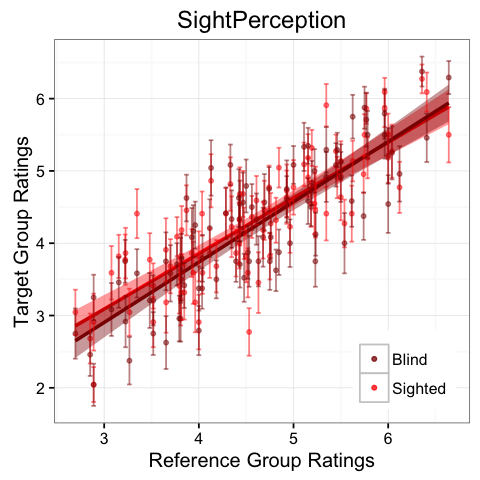

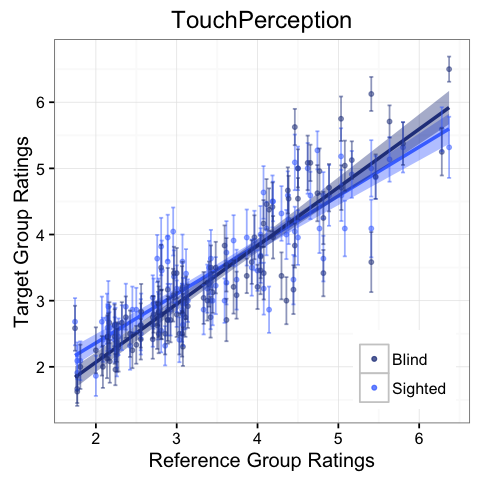

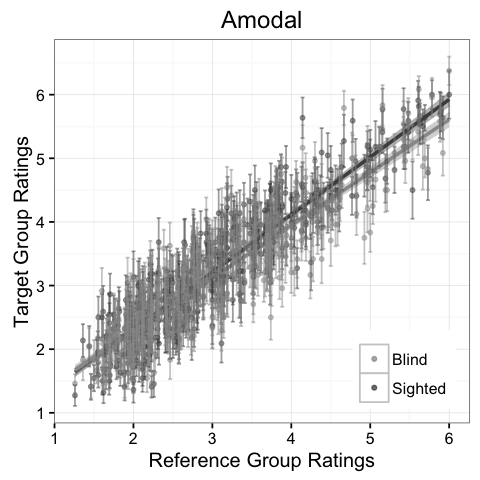

In [38]:
#Plot the correlation with individual verbs between two sighted groups and sighted and blind group

options(repr.plot.width=4, repr.plot.height=4)
conditions = "SightPerception"

if(conditions == "SightPerception"){
  cS = "red1"
  cB = "red4"
}

if(conditions == "TouchPerception"){
  cS = "royalblue1"
  cB = "royalblue4"
}

if(conditions == "Amodal"){
  cS = "gray30"
  cB = "gray60"
}

#correlation plot with error bars
ggplot(subset(verbdata_wide,C1 %in% conditions & C2 %in% conditions)) +
  xlab("Reference Group Ratings") + ylab("Target Group Ratings") + ggtitle(paste(conditions, collapse =", ")) + 
  geom_point(aes(x = mean.REF,y = mean.S, color="Sighted"),size = 1, alpha = .5) + stat_smooth(aes(x=mean.REF,y=mean.S,color=cS),method = "glm",color=cS,fill=cS)  + 
  geom_point(aes(x = mean.REF,y = mean.B, color="Blind"), size = 1, alpha = .5) + stat_smooth(aes(x=mean.REF,y=mean.B),method = "glm",color=cB,fill=cB) +
  
  geom_errorbar(aes(x=mean.REF, ymin=mean.S-se.S, ymax=mean.S+se.S), color=cS, width=.05,alpha=.5) + 
  geom_errorbar(aes(x=mean.REF, ymin=mean.B-se.B, ymax=mean.B+se.B), color=cB, width=.05,alpha=.5) +
  #geom_text(aes(x = mean.REF,y = mean.S, label=verbnames), size=2) + 
  #geom_text(data = subset(verbdata_wide, C1 %in% conditions & C2 %in% conditions & (V1=="to_see" | V2=="to_see")), aes(x = mean.REF,y = mean.S,label=Vboth), vjust=0) + 
  #geom_text(aes(x = mean.REF,y = mean.B, label=verbnames), size=3) + 
  #geom_text(data = subset(verbdata_wide, C1 %in% conditions & C2 %in% conditions & (V1=="to_see" | V2=="to_see")), aes(x = mean.REF,y = mean.S, label=verbnames), size=2,color=cS, vjust=0) +  
  #geom_point(data = subset(verbdata_wide, C1 %in% conditions & C2 %in% conditions & (V1=="to_see" | V2=="to_see")), aes(x = mean.REF,y = mean.S),color="red", size = 2, alpha =1) +
  #geom_text(data = subset(verbdata_wide, C1 %in% conditions & C2 %in% conditions & (V1=="to_see" | V2=="to_see")), aes(x = mean.REF,y = mean.B, label=verbnames), vjust=0, color=cB) +  
  #geom_point(data = subset(verbdata_wide, C1 %in% conditions & C2 %in% conditions & (V1=="to_see" | V2=="to_see")), aes(x = mean.REF,y = mean.B),color="black", size = 2, alpha =1) +
  theme_bw() + 
  scale_fill_manual(values = c(cB,cS))+ 
  scale_color_manual(values = c(cB,cS)) + 
  theme(legend.justification=c(1,0), legend.position=c(1,0), legend.title=element_blank()) # Position legend in bottom right

conditions = "TouchPerception"

if(conditions == "SightPerception"){
  cS = "red1"
  cB = "red4"
}

if(conditions == "TouchPerception"){
  cS = "royalblue1"
  cB = "royalblue4"
}

if(conditions == "Amodal"){
  cS = "gray30"
  cB = "gray60"
}

#correlation plot with error bars
ggplot(subset(verbdata_wide,C1 %in% conditions & C2 %in% conditions)) +
  xlab("Reference Group Ratings") + ylab("Target Group Ratings") + ggtitle(paste(conditions, collapse =", ")) + 
  geom_point(aes(x = mean.REF,y = mean.S, color="Sighted"),size = 1, alpha = .5) + stat_smooth(aes(x=mean.REF,y=mean.S,color=cS),method = "glm",color=cS,fill=cS)  + 
  geom_point(aes(x = mean.REF,y = mean.B, color="Blind"), size = 1, alpha = .5) + stat_smooth(aes(x=mean.REF,y=mean.B),method = "glm",color=cB,fill=cB) +
  
  geom_errorbar(aes(x=mean.REF, ymin=mean.S-se.S, ymax=mean.S+se.S), color=cS, width=.05,alpha=.5) + 
  geom_errorbar(aes(x=mean.REF, ymin=mean.B-se.B, ymax=mean.B+se.B), color=cB, width=.05,alpha=.5) +
  #geom_text(aes(x = mean.REF,y = mean.S, label=verbnames), size=2) + 
  #geom_text(data = subset(verbdata_wide, C1 %in% conditions & C2 %in% conditions & (V1=="to_see" | V2=="to_see")), aes(x = mean.REF,y = mean.S,label=Vboth), vjust=0) + 
  #geom_text(aes(x = mean.REF,y = mean.B, label=verbnames), size=3) + 
  #geom_text(data = subset(verbdata_wide, C1 %in% conditions & C2 %in% conditions & (V1=="to_see" | V2=="to_see")), aes(x = mean.REF,y = mean.S, label=verbnames), size=2,color=cS, vjust=0) +  
  #geom_point(data = subset(verbdata_wide, C1 %in% conditions & C2 %in% conditions & (V1=="to_see" | V2=="to_see")), aes(x = mean.REF,y = mean.S),color="red", size = 2, alpha =1) +
  #geom_text(data = subset(verbdata_wide, C1 %in% conditions & C2 %in% conditions & (V1=="to_see" | V2=="to_see")), aes(x = mean.REF,y = mean.B, label=verbnames), vjust=0, color=cB) +  
  #geom_point(data = subset(verbdata_wide, C1 %in% conditions & C2 %in% conditions & (V1=="to_see" | V2=="to_see")), aes(x = mean.REF,y = mean.B),color="black", size = 2, alpha =1) +
  theme_bw() + 
  scale_fill_manual(values = c(cB,cS))+ 
  scale_color_manual(values = c(cB,cS)) + 
  theme(legend.justification=c(1,0), legend.position=c(1,0), legend.title=element_blank()) # Position legend in bottom right

conditions = "Amodal"

if(conditions == "SightPerception"){
  cS = "red1"
  cB = "red4"
}

if(conditions == "TouchPerception"){
  cS = "royalblue1"
  cB = "royalblue4"
}

if(conditions == "Amodal"){
  cS = "gray30"
  cB = "gray60"
}

#correlation plot with error bars
ggplot(subset(verbdata_wide,C1 %in% conditions & C2 %in% conditions)) +
  xlab("Reference Group Ratings") + ylab("Target Group Ratings") + ggtitle(paste(conditions, collapse =", ")) + 
  geom_point(aes(x = mean.REF,y = mean.S, color="Sighted"),size = 1, alpha = .5) + stat_smooth(aes(x=mean.REF,y=mean.S,color=cS),method = "glm",color=cS,fill=cS)  + 
  geom_point(aes(x = mean.REF,y = mean.B, color="Blind"), size = 1, alpha = .5) + stat_smooth(aes(x=mean.REF,y=mean.B),method = "glm",color=cB,fill=cB) +
  
  geom_errorbar(aes(x=mean.REF, ymin=mean.S-se.S, ymax=mean.S+se.S), color=cS, width=.05,alpha=.5) + 
  geom_errorbar(aes(x=mean.REF, ymin=mean.B-se.B, ymax=mean.B+se.B), color=cB, width=.05,alpha=.5) +
  #geom_text(aes(x = mean.REF,y = mean.S, label=verbnames), size=2) + 
  #geom_text(data = subset(verbdata_wide, C1 %in% conditions & C2 %in% conditions & (V1=="to_see" | V2=="to_see")), aes(x = mean.REF,y = mean.S,label=Vboth), vjust=0) + 
  #geom_text(aes(x = mean.REF,y = mean.B, label=verbnames), size=3) + 
  #geom_text(data = subset(verbdata_wide, C1 %in% conditions & C2 %in% conditions & (V1=="to_see" | V2=="to_see")), aes(x = mean.REF,y = mean.S, label=verbnames), size=2,color=cS, vjust=0) +  
  #geom_point(data = subset(verbdata_wide, C1 %in% conditions & C2 %in% conditions & (V1=="to_see" | V2=="to_see")), aes(x = mean.REF,y = mean.S),color="red", size = 2, alpha =1) +
  #geom_text(data = subset(verbdata_wide, C1 %in% conditions & C2 %in% conditions & (V1=="to_see" | V2=="to_see")), aes(x = mean.REF,y = mean.B, label=verbnames), vjust=0, color=cB) +  
  #geom_point(data = subset(verbdata_wide, C1 %in% conditions & C2 %in% conditions & (V1=="to_see" | V2=="to_see")), aes(x = mean.REF,y = mean.B),color="black", size = 2, alpha =1) +
  theme_bw() + 
  scale_fill_manual(values = c(cB,cS))+ 
  scale_color_manual(values = c(cB,cS)) + 
  theme(legend.justification=c(1,0), legend.position=c(1,0), legend.title=element_blank()) # Position legend in bottom right



In [39]:
# individual correlation with reference group ----- 
indzs = NA

as.data.frame(matrix(unlist(unique(subjdata$subject)), ncol = 1, byrow = TRUE)) -> subjs
colnames(subjs) <- "subject"
subjdata[subjs$subject,]$Group -> subjs$Group

allconditions = c("SightEmission","SoundEmission", "SoundAgent",  "SightPerception", "TouchPerception", "Amodal", "Motion")

for(c in allconditions){
  conditions = c
  for(s in 1:length(subjs$subject)){v <-rcorr(datamelt[datamelt$subject == subjs$subject[s]  & datamelt$C1 %in% conditions & datamelt$C2 %in% conditions,,]$value, verbdata[verbdata$Group == "REF" & verbdata$C1 %in% conditions & verbdata$C2 %in% conditions,]$mean)
                                    subjs$r_ref[s] <- v$r[2]
                                    subjs$p_ref[s] <- v$P[2]
  }
  
  subjs -> ind_ref_corr
  fisherz(ind_ref_corr$r_ref) -> ind_ref_corr$z_ref
  
  ttestd<-t.test(ind_ref_corr$z_ref[ ind_ref_corr$Group=="S"],ind_ref_corr$z_ref[ ind_ref_corr$Group=="B"]) 
  
  ind_ref_corr_summary <- aggregate(ind_ref_corr$z_ref,list(ind_ref_corr$Group),FUN= function(x) c(m=mean(x, na.rm=TRUE), sd=sd(x, na.rm=TRUE), se=std.error(x)))
  fisherz2r(ind_ref_corr_summary$x) -> ind_ref_corr_summary_r
  cbind(conditions,levels(ind_ref_corr$Group),round(as.data.frame(ind_ref_corr_summary_r),2)) -> temp
  cbind(conditions,levels(ind_ref_corr$Group),round(as.data.frame(ind_ref_corr_summary$x),2)) -> temp2
  indzs <- rbind(indzs,temp2)
  cat(paste(conditions), paste(temp[,2],": ", temp[,3], "±", temp[,4], "; ", sep=""), paste("t(", round(ttestd$parameter,2), ")=", round(ttestd$statistic,2), ", p=",round(ttestd$p.value,2),sep=""),"\n" )
}
names(indzs)[2] <- "Group"

#ttestd<-t.test(touchtemp$z_ref[ touchtemp$Group=="B"],sighttemp$z_ref[ sighttemp$Group=="B"]) 
#touch_summary <- aggregate(touchtemp$z_ref,list(touchtemp$Group),FUN= function(x) c(m=mean(x, na.rm=TRUE), sd=sd(x, na.rm=TRUE), se=std.error(x)))
#sight_summary <- aggregate(sighttemp$z_ref,list(sighttemp$Group),FUN= function(x) c(m=mean(x, na.rm=TRUE), sd=sd(x, na.rm=TRUE), se=std.error(x)))


Warning message:
In sqrt(npair - 2): NaNs produced

SightEmission B: 0.59±0.23;  L: 0.62±0.1;  REF: NaN±NA;  S: 0.6±0.23;  t(42.49)=0.42, p=0.68 


Warning message:
In sqrt(npair - 2): NaNs produced

SoundEmission B: 0.51±0.15;  L: 0.55±0.1;  REF: NaN±NA;  S: 0.44±0.17;  t(41.19)=-2.03, p=0.05 


Warning message:
In sqrt(npair - 2): NaNs produced

SoundAgent B: 0.62±0.18;  L: 0.64±0.18;  REF: NaN±NA;  S: 0.55±0.21;  t(39.39)=-1.93, p=0.06 


Warning message:
In sqrt(npair - 2): NaNs produced

SightPerception B: 0.5±0.19;  L: 0.55±0.14;  REF: NaN±NA;  S: 0.48±0.14;  t(41.38)=-0.69, p=0.49 


Warning message:
In sqrt(npair - 2): NaNs produced

TouchPerception B: 0.61±0.18;  L: 0.66±0.13;  REF: NaN±NA;  S: 0.52±0.23;  t(39.42)=-2.11, p=0.04 


Warning message:
In sqrt(npair - 2): NaNs produced

Amodal B: 0.58±0.19;  L: 0.59±0.16;  REF: NaN±NA;  S: 0.59±0.18;  t(43.98)=0.23, p=0.82 


Warning message:
In sqrt(npair - 2): NaNs produced

Motion B: 0.58±0.23;  L: 0.63±0.24;  REF: NaN±NA;  S: 0.59±0.22;  t(43.32)=0.17, p=0.87 


In [40]:
#correlation with leave one out from own group

for(c in allconditions){
  conditions = c
  for(s in 1:length(subjs$subject)){
    if(subjs$subject[s] != "REF_01"){
      gdata = datamelt[datamelt$subject != subjs$subject[s] & datamelt$Group == subjs$Group[s],]
      
      group_one_out <- aggregate(c(gdata$value), list(gdata$Vboth, gdata$Group, gdata$Category, gdata$SubCategory, gdata$C1, gdata$C2, gdata$V1,gdata$V2 ), FUN= function(x) c(m=mean(x, na.rm=TRUE), sd=sd(x, na.rm=TRUE)))
      group_one_out$x[,1] -> group_one_out$mean
      group_one_out$x[,2] -> group_one_out$sd
      group_one_out$x <- NULL
      names(group_one_out) <- c("Vboth", "Group", "Category", "SubCategory", "C1","C2", "V1", "V2", "mean", "sd")
      group_one_out <- group_one_out[order(group_one_out$Vboth),]
      
      v <-rcorr(datamelt[datamelt$subject == subjs$subject[s]  & datamelt$C1 %in% conditions & datamelt$C2 %in% conditions,,]$value, group_one_out[group_one_out$C1 %in% conditions & group_one_out$C2 %in% conditions,]$mean)
      subjs$r_loo[s] <- v$r[2]
      subjs$p_loo[s] <- v$P[2]
    }}
  
  subjs -> ind_group_corr
  fisherz(ind_group_corr$r_loo) -> ind_group_corr$z_loo
  
  ttestd<-t.test(ind_group_corr$z_loo[ ind_group_corr$Group=="S"],ind_group_corr$z_loo[ ind_group_corr$Group=="B"]) 
  
  ind_group_corr_summary <- aggregate(ind_group_corr$z_loo,list(ind_group_corr$Group),FUN= function(x) c(m=mean(x, na.rm=TRUE), sd=sd(x, na.rm=TRUE), se=std.error(x)))
  fisherz2r(ind_group_corr_summary$x) -> ind_group_corr_summary_r
  cbind(levels(ind_group_corr$Group),round(as.data.frame(ind_group_corr_summary_r),2)) -> temp
  
  cat(paste(conditions), paste(temp[,1],": ", temp[,2], "±", temp[,3], "; ", sep=""), paste("t(", round(ttestd$parameter,2), ")=", round(ttestd$statistic,2), ", p=",round(ttestd$p.value,2),sep=""),"\n" )

}

Warning message:
In sqrt(npair - 2): NaNs produced

SightEmission B: 0.59±0.23;  L: 0.61±0.09;  REF: 0.67±NA;  S: 0.61±0.23;  t(42.43)=0.43, p=0.67 


Warning message:
In sqrt(npair - 2): NaNs produced

SoundEmission B: 0.54±0.17;  L: 0.54±0.12;  REF: 0.67±NA;  S: 0.43±0.19;  t(40.59)=-2.75, p=0.01 


Warning message:
In sqrt(npair - 2): NaNs produced

SoundAgent B: 0.64±0.19;  L: 0.63±0.19;  REF: 0.67±NA;  S: 0.55±0.2;  t(41.63)=-2.17, p=0.04 


Warning message:
In sqrt(npair - 2): NaNs produced

SightPerception B: 0.55±0.22;  L: 0.56±0.11;  REF: 0.67±NA;  S: 0.51±0.16;  t(42.08)=-0.9, p=0.37 


Warning message:
In sqrt(npair - 2): NaNs produced

TouchPerception B: 0.64±0.22;  L: 0.67±0.15;  REF: 0.67±NA;  S: 0.53±0.24;  t(42.43)=-2.5, p=0.02 


Warning message:
In sqrt(npair - 2): NaNs produced

Amodal B: 0.6±0.18;  L: 0.59±0.15;  REF: 0.67±NA;  S: 0.6±0.2;  t(42.45)=-0.06, p=0.96 


Warning message:
In sqrt(npair - 2): NaNs produced

Motion B: 0.6±0.24;  L: 0.63±0.23;  REF: 0.67±NA;  S: 0.59±0.18;  t(43.75)=-0.26, p=0.8 


## MDS within category

In [115]:
## INDSCAL for all participants  ------------------------------------------------------

groups = c("B","S")

#conditions = c("SightEmission","SoundEmission") 
#conditions = c("SightEmission","SoundEmission") 
#conditions = c("SightEmission")
conditions = c("SightPerception")
#conditions = c("SoundEmission","SoundAgent")
#conditions = c("SightEmission","SoundEmission","SoundAgent")


paste(conditions, sep="_",collapse = "_") -> c 

for (group in groups){
  
  #get rid of the participants with missing data 
  temp <- subj.dis.square[[c]][sapply(subj.dis.square[[c]],function(x) !any(is.na(x)))]
  #temp <- subj.dis.square[[c]]
  temp<-temp[grepl(group[1],names(temp))]
  temp <- lapply(temp,function(x) as.dist(x))
  
  #because otherwise it was droppping folks... 
  temp2 <- temp[c(1:length(temp))]
  
  #Non-metric to avoid assumptions about linear distance 
  IDS.space <- smacofIndDiff(temp2,constraint="indscal",ndim=3,itmax = 1000, type ="ordinal" )
  
  if(group=="S")
  {IDS.space -> IDS.space.sighted.single}
  if(group=="B")
  {IDS.space -> IDS.space.blind.single}
  
}



Warning message:
In smacofIndDiff(temp2, constraint = "indscal", ndim = 3, itmax = 1000, : Iteration limit reached! Increase itmax argument!Warning message:
In smacofIndDiff(temp2, constraint = "indscal", ndim = 3, itmax = 1000, : Iteration limit reached! Increase itmax argument!

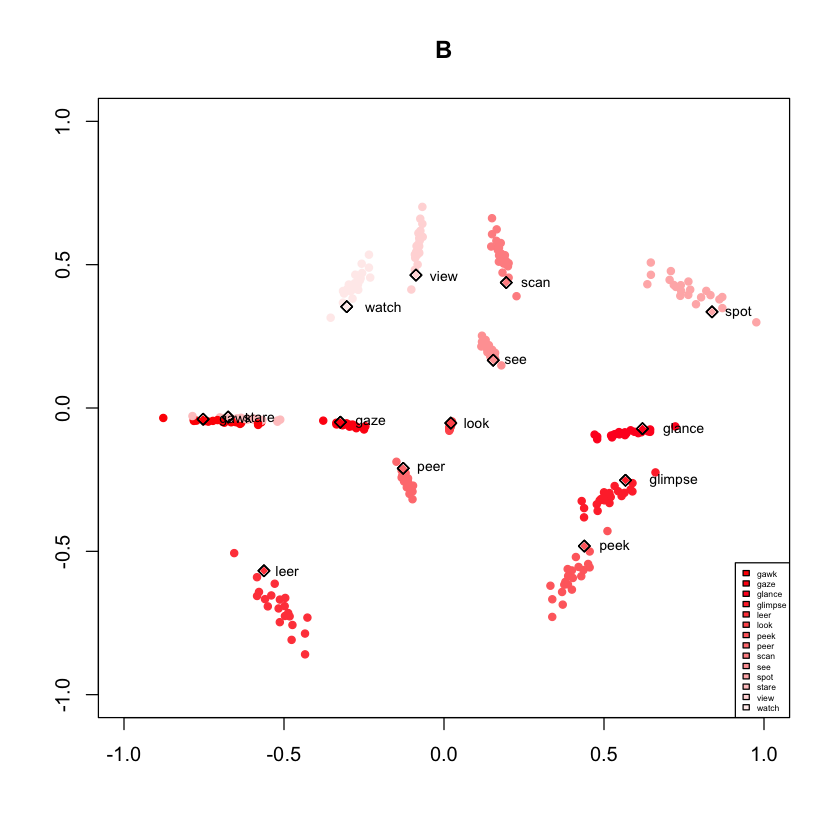

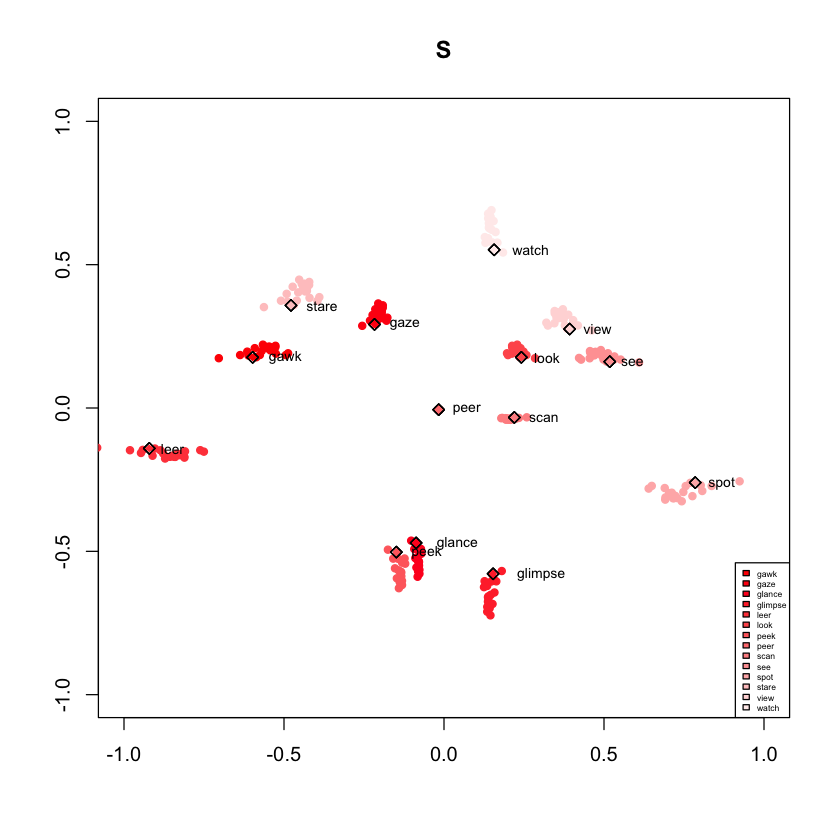

In [116]:
#graph

options(repr.plot.width=7, repr.plot.height=7)

vnames <- dis.square[[c]]$verbs
vnames$color <- "red"

colfunc <- colorRampPalette(c("red", "white")); reds <- colfunc(15)

vnames$color2 <- NA 
vnames[vnames$color == "red",]$color2 <- reds[1:length(vnames[vnames$color == "red",]$color)]

for (group in groups){
  dim1<-1; dim2<-2; dim3<-3
  ifelse(group=="S",1,1) -> flip
  
  
  if(group=="S")
  {IDS.space <- IDS.space.sighted.single
  x1 <- IDS.space$gspace[,dim1]; y1 <- IDS.space$gspace[,dim2]; z1 <- IDS.space$gspace[,dim3]
  
  plot(flip*x1, y1, type="n", xlab="", ylab="", main=paste(group), ylim = c(-1,1), xlim = c(-1,1))
  for(s in 1:length(IDS.space$conf)){
    x <- flip*IDS.space$conf[[s]][,dim1]
    y <- IDS.space$conf[[s]][,dim2]
    
    points(x, y,pch=19, col=vnames$color2,cex=.8) 
    
    if(grepl("B",names(temp2)[s])){
      points(x, y,pch=19, col=vnames$color2,cex=.8)}
  }
  
  points(flip*x1, y1,pch=5, col="black",cex=.9);points(flip*x1, y1,pch=5, col="black",cex=.9);points(flip*x1, y1,pch=5, col="black",cex=.9);points(flip*x1, y1,pch=5, col="black",cex=.9);
  points(flip*x1, y1,pch=18, col=vnames$color2,cex=.8);points(flip*x1, y1,pch=18, col=vnames$color2,cex=.8);points(flip*x1, y1,pch=18, col=vnames$color2,cex=.8);points(flip*x1, y1,pch=18, col=vnames$color2,cex=.8);
  text(x1,y1, names(x1), cex=.7, col=("black"),adj=-.5)
  
  }
  
  if(group=="B")
  {IDS.space <- IDS.space.blind.single
  x1 <- IDS.space$gspace[,dim1]; y1 <- IDS.space$gspace[,dim2]; z1 <- IDS.space$gspace[,dim3]
  
  plot(flip*x1, y1, type="n", xlab="", ylab="", main=paste(group), ylim = c(-1,1), xlim = c(-1,1))
  for(s in 1:length(IDS.space$conf)){
    x <- flip*IDS.space$conf[[s]][,dim1]
    y <- IDS.space$conf[[s]][,dim2]
    
    if(grepl("S",names(temp2)[s])){
      points(x, y,pch=19, col=vnames$color2,cex=.8)}
    
    
    if(grepl("B",names(temp2)[s])){
      points(x, y,pch=19, col=vnames$color2,cex=.8)}
  }

  points(flip*x1, y1,pch=5, col="black",cex=.9);points(flip*x1, y1,pch=5, col="black",cex=.9);points(flip*x1, y1,pch=5, col="black",cex=.9);points(flip*x1, y1,pch=5, col="black",cex=.9);
  points(flip*x1, y1,pch=18, col=vnames$color2,cex=.8);points(flip*x1, y1,pch=18, col=vnames$color2,cex=.8);points(flip*x1, y1,pch=18, col=vnames$color2,cex=.8);points(flip*x1, y1,pch=18, col=vnames$color2,cex=.8);
  text(x1,y1, names(x1), cex=.7, col=("black"),adj=-.5)
  
  }

  vnames2<-vnames[with(vnames, order(C1, V1)), ]
  
  legend("bottomright",legend = vnames$V1, fill=vnames$color2,cex = .43) 
}


In [62]:
#WHOLE GROUP 

#get rid of the participants with missing data 
temp <- subj.dis.square[[c]][sapply(subj.dis.square[[c]],function(x) !any(is.na(x)))]
temp<-temp[grepl("S",names(temp)) | grepl("B",names(temp))]
temp <- lapply(temp,function(x) as.dist(x))

#because otherwise it was droppping folks... 
temp2 <- temp[c(1:length(temp))]

#Non-metric to avoid assumptions about linear distance 
IDS.space.group.single <- smacofIndDiff(temp2,constraint="indscal",ndim=10,itmax = 1000, type = "ordinal")



Warning message:
In smacofIndDiff(temp2, constraint = "indscal", ndim = 10, itmax = 1000, : Iteration limit reached! Increase itmax argument!

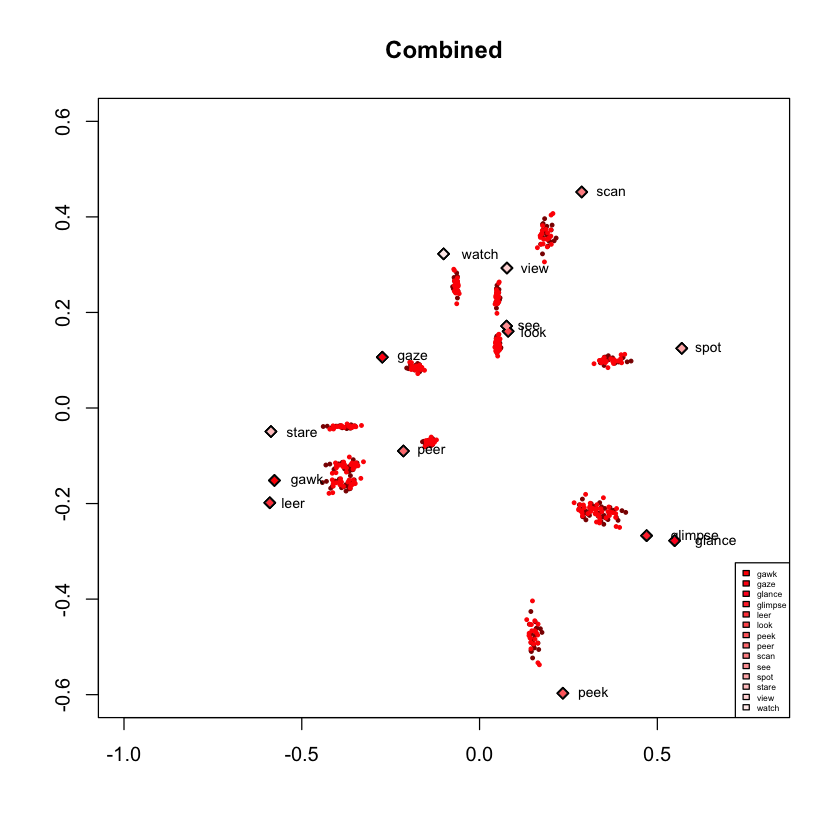

In [59]:
#graph
dim1<-1; dim2<-2; dim3<-3
x1 <- IDS.space.group.single$gspace[,dim1]; y1 <- IDS.space.group.single$gspace[,dim2]; z1 <- IDS.space.group.single$gspace[,dim3]

#col = c("red4","red1","royalblue4","royalblue1","grey30","grey60","red4","red1","royalblue4","royalblue1","purple4","purple1"),

vnames$colorS <- NA 
vnames[vnames$color == "red",]$colorS <- "red1"
vnames$colorB <- NA 
vnames[vnames$color == "red",]$colorB <- "red4"


plot(flip*x1, y1, type="n", xlab="", ylab="", main="Combined", ylim = c(-.6,.6), xlim = c(-1,.8))
for(subj in 1:length(IDS.space.group.single$conf)){
  x <- flip*IDS.space.group.single$conf[[subj]][,dim1]
  y <- IDS.space.group.single$conf[[subj]][,dim2]
  
  if(grepl("S",names(temp2)[subj])){
    points(x, y,pch=19, col=vnames$colorS,cex=.4)}
  
  if(grepl("B",names(temp2)[subj])){
    points(x, y,pch=19, col=vnames$colorB,cex=.4,)}
  
}


text(x1,y1, names(x1), cex=.7, col=("black"),adj=-.5)
points(flip*x1, y1,pch=5, col="black",cex=.6);points(flip*x1, y1,pch=5, col="black",cex=.9);points(flip*x1, y1,pch=5, col="black",cex=.9);points(flip*x1, y1,pch=5, col="black",cex=.9);
points(flip*x1, y1,pch=18, col=vnames$color2,cex=.5);points(flip*x1, y1,pch=18, col=vnames$color2,cex=.8);points(flip*x1, y1,pch=18, col=vnames$color2,cex=.8);points(flip*x1, y1,pch=18, col=vnames$color2,cex=.8);

legend("bottomright",legend = vnames$V1, fill=vnames$color2,cex = .43) 
